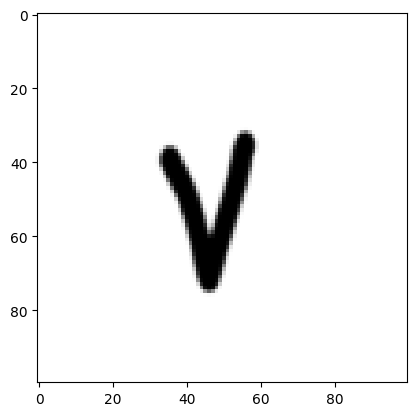

In [8]:
import os
import pandas as pd
import numpy as np
import sys
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern
from skimage.transform import resize
from skimage.feature import hog
from skimage.feature import sift
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
image_dir = '/Users/metoditarnev/Desktop/letters/img'
#Get the firts image from the folder
image = imread(os.path.join(image_dir, os.listdir(image_dir)[0]), as_gray=True)
#Get the pixel features
features = np.reshape(image.flatten(), (900*1200))
np.set_printoptions(threshold=np.inf)
# shape of feature array
print('\n\nShape of the feature array = ',features.shape)

print('\n\nFeature Array\n\n',features)



In [1]:
#Resize images and save in a new folder
from skimage import io, transform
import os

# Set the path to the directory where your original images are stored
image_dir = '/Users/metoditarnev/Desktop/letters/imagesTest'

# Set the path to the directory where you want to save the resized images
resized_dir = '/Users/metoditarnev/Desktop/letters/resized_img'

# Create the directory if it doesn't exist
if not os.path.exists(resized_dir):
    os.makedirs(resized_dir)




AttributeError: 'str' object has no attribute 'shape'

In [6]:
## Loop through the images in the original directory and resize them
for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        image_path = f"{image_dir}/{filename}"
        resized_path = f"{resized_dir}/{filename}"
        image = io.imread(image_path)
        resized_image = transform.resize(image, (100, 100))
        io.imsave(resized_path, resized_image)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

In [2]:
import os
import shutil

# Define the folder path
folder_path = '/Users/metoditarnev/Desktop/letters/ImagesCVtest'


# Get the list of file names in the folder
file_names = os.listdir(folder_path)

# Sort the file names alphabetically
file_names.sort()

# Iterate over the sorted file names and move them to a new folder
new_folder_path = '/Users/metoditarnev/Desktop/letters/ImagesCVtest_sorted'
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)
for file_name in file_names:
    old_file_path = os.path.join(folder_path, file_name)
    new_file_path = os.path.join(new_folder_path, file_name)
    shutil.move(old_file_path, new_file_path)

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.io import imread

# Define the path to the folder containing the images
folder_path = '/Users/metoditarnev/Desktop/letters/resized_img_sorted'

# Define the path to the CSV file containing the labels
csv_path = '/Users/metoditarnev/Desktop/letters/english.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_path)
df.shape

(3410, 2)

In [12]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.io import imread

# Define the path to the folder containing the images
folder_path = '/Users/metoditarnev/Desktop/letters/resized_img_sorted'

# Define the path to the CSV file containing the labels
csv_path = '/Users/metoditarnev/Desktop/letters/english.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_path)

# Initialize empty lists to hold the image data and labels
X = []
y = []

# Iterate over the rows of the DataFrame and load each image and its label
for index, row in df.iterrows():
    file_name = row['image']
    label = row['label']
    if file_name.endswith('.png'):
        # Load the image and convert it to grayscale
        image_path = os.path.join(folder_path, file_name)
        image = imread(image_path)
        gray = rgb2gray(image)

        # Extract HOG features from the image
        features = hog(gray, block_norm='L2-Hys', pixels_per_cell=(16, 16), cells_per_block=(1, 1))

        # Append the feature vector to X and the label to y
        X.append(features)
        y.append(label)

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SVM classifier and fit it to the training data
clf = SVC(kernel='linear', C=1, gamma='scale', random_state=42)
clf.fit(X_train, y_train)

# Predict the labels of the test data using the SVM classifier
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5425219941348973


In [41]:
import joblib

# train and tune your SVM model here

# save the model to a file
joblib.dump(clf, 'svm_model1.pkl')

['svm_model1.pkl']

In [13]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.io import imread

# Define the path to the folder containing the images
folder_path = '/Users/metoditarnev/Desktop/letters/resized_img_sorted'

# Define the path to the CSV file containing the labels
csv_path = '/Users/metoditarnev/Desktop/letters/english.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_path)

# Initialize empty lists to hold the image data and labels
X = []
y = []

# Iterate over the rows of the DataFrame and load each image and its label
for index, row in df.iterrows():
    file_name = row['image']
    label = row['label']
    if file_name.endswith('.png'):
        # Load the image and convert it to grayscale
        image_path = os.path.join(folder_path, file_name)
        image = imread(image_path)
        gray = rgb2gray(image)

        # Extract HOG features from the image
        features = hog(gray,
                       orientations=8,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2),
                       block_norm='L2-Hys')

        # Add the features and label to the X and y lists
        X.append(features)
        y.append(label)

# Convert the X and y lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': [2, 3, 4]}

# Define the SVM model
svm_model = SVC()

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Use the best hyperparameters to train the SVM model on the entire dataset
best_params = grid_search.best_params_
svm_model = SVC(C=best_params['C'], kernel=best_params['kernel'], degree=best_params['degree'])
svm_model.fit(X, y)

# Evaluate the SVM model on the testing set and print the accuracy
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Best hyperparameters:  {'C': 10, 'degree': 2, 'kernel': 'rbf'}
Best accuracy:  0.6301266928789865
Accuracy:  1.0


In [14]:
import joblib

# train and tune your SVM model here

# save the model to a file
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [26]:
from PIL import Image

# load the RGBA image
rgba_image = Image.open('images/img_22.png')

# convert to RGB
rgb_image = rgba_image.convert('RGB')
rgb_image.save('images/img_22.png')

In [ ]:
# load the model from a file
svm_model = joblib.load('svm_model1.pkl')
#test your model here

(100, 100, 3)

In [25]:
import numpy as np
import cv2
from skimage.io import imread
from skimage.io import imsave
# import imshow from matplotlib
from matplotlib.pyplot import imshow

# Load the image
img_gray = cv2.imread('letter_0.png', cv2.IMREAD_GRAYSCALE)
# Create a new image with 3 channels
img_rgb = np.zeros((img_gray.shape[0], img_gray.shape[1], 3), dtype=np.uint8)

# Copy the grayscale image into each channel
img_rgb[:,:,0] = img_gray
img_rgb[:,:,1] = img_gray
img_rgb[:,:,2] = img_gray

# Save the new image as JPEG with 3 channels
cv2.imwrite('new_image_0.png', img_rgb, [cv2.IMWRITE_JPEG_QUALITY, 100, cv2.IMWRITE_JPEG_CHROMA_QUALITY, 100])




True

In [29]:
import cv2
import numpy as np

# Load the image in grayscale mode
img_gray = cv2.imread('letter_0.png', cv2.IMREAD_GRAYSCALE)

# Create a new 3-channel image
img_rgb = np.zeros((img_gray.shape[0], img_gray.shape[1], 3), dtype=np.uint8)

# Copy the grayscale image into each channel
img_rgb[:,:,0] = img_gray
img_rgb[:,:,1] = img_gray
img_rgb[:,:,2] = img_gray

# Use the new image in your code
# For example, you can display the new image using cv2.imshow()
cv2.imshow('New Image', img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(img_rgb.shape)

(100, 100, 3)


In [95]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage.color import rgb2gray
import joblib

# load the saved model from the file
svm_model = joblib.load('svm_model6.pkl')

# load the image of the letter you want to recognize
letter_img = imread('images/letter_0.png')
letter_img.shape

gray = rgb2gray(letter_img)


# extract HOG features from the letter image
letter_hog = hog(gray,
                       orientations=8,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2),
                       block_norm='L2-Hys')
# make a prediction using the SVM model
letter_pred = svm_model.predict([letter_hog])

# print the predicted label
print('Predicted label:', letter_pred[0])

Predicted label: a


In [115]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.io import imread

# Define the path to the folder containing the images
New_folder_path = '/Users/metoditarnev/Desktop/letters/resized_img_sorted'

# Define the path to the CSV file containing the labels
New_csv_path = '/Users/metoditarnev/Desktop/letters/english.csv'

# Load the CSV file into a pandas DataFrame
New_df = pd.read_csv(csv_path)

# Initialize empty lists to hold the image data and labels
New_X = []
New_y = []

# Iterate over the rows of the DataFrame and load each image and its label
for index, row in New_df.iterrows():
    file_name = row['image']
    label = row['label']
    if file_name.endswith('.png'):
        # Load the image and convert it to grayscale
        image_path = os.path.join(New_folder_path, file_name)
        image = imread(image_path)
        gray = rgb2gray(image)

        # Extract HOG features from the image
        features = hog(gray,
                       orientations=8,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2),
                       block_norm='L2-Hys')

        # Add the features and label to the X and y lists
        New_X.append(features)
        New_y.append(label)

# Convert the X and y lists to numpy arrays
New_X = np.array(New_X)
New_y = np.array(New_y)

# Split the dataset into training and testing sets
New_X_train, New_X_test, New_y_train, New_y_test = train_test_split(New_X, New_y, test_size=0.2, random_state=42)

# Define the parameter grid to search over
New_param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': [2, 3, 4]}

# Define the SVM model
New_svm_model = SVC()

# Perform grid search cross-validation to find the best hyperparameters
New_grid_search = GridSearchCV(New_svm_model, New_param_grid, cv=5, scoring='accuracy')
New_grid_search.fit(New_X_train, New_y_train)

# Print the best hyperparameters and their corresponding accuracy
print("Best hyperparameters: ", New_grid_search.best_params_)
print("Best accuracy: ", New_grid_search.best_score_)

# Use the best hyperparameters to train the SVM model on the entire dataset
New_best_params = New_grid_search.best_params_
svm_model_1 = SVC(C=New_best_params['C'], kernel=New_best_params['kernel'], degree=New_best_params['degree'])
svm_model_1.fit(New_X_train, New_y_train)

# Evaluate the SVM model on the testing set and print the accuracy
New_y_pred = svm_model_1.predict(New_X_test)
New_accuracy = accuracy_score(New_y_test, New_y_pred)
print("Accuracy: ", New_accuracy)

Best hyperparameters:  {'C': 10, 'degree': 2, 'kernel': 'rbf'}
Best accuracy:  0.6301266928789865
Accuracy:  0.655425219941349


In [116]:
import joblib
joblib.dump(svm_model_1, 'svm_model4.pkl')


['svm_model4.pkl']

In [166]:
import cv2
import numpy as np
from skimage.feature import hog
import joblib

# Load the pre-trained SVM model
clf = joblib.load('svm_model4.pkl')

# Load the input image
img = cv2.imread('img_10.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to obtain a binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize an empty list to store the letters
letters = []

# Iterate over the contours
for contour in contours:
    # Get the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Extract the letter from the original image
    letter = img[y:y+h, x:x+w]

    # Resize the letter to 100x100 pixels
    letter = cv2.resize(letter, (100, 100))

    # Convert the letter to grayscale
    gray_letter = cv2.cvtColor(letter, cv2.COLOR_BGR2GRAY)

    # Extract HOG features from the letter
    features = hog(gray_letter,
                   orientations=8,
                   pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2),
                   block_norm='L2-Hys')

    # Make a prediction for the letter using the pre-trained SVM model
    prediction = clf.predict([features])

    # Add the predicted letter to the list of letters
    letters.append(prediction[0])

# Print the recognized word
print(''.join(letters))

WcZWZM


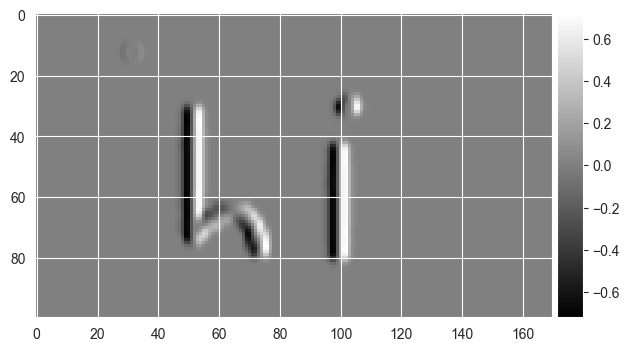

In [167]:
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image
image = imread('img_9.png',as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

In [198]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.feature import hog
import joblib

# Load the trained model
model = joblib.load('svm_model4.pkl')

# Load the image of the word
image = imread('img_9.png')

# Convert the image to grayscale
gray = rgb2gray(image)

# Define the size of each letter
letter_size = (100, 100)

# Split the word into letters and predict each letter using the loaded model
word = ''
for i in range(image.shape[1] // letter_size[1]):
    letter = ''
    for j in range(image.shape[0] // letter_size[0]):
        # Extract the letter image from the original image
        letter_image = gray[j*letter_size[0]:(j+1)*letter_size[0], i*letter_size[1]:(i+1)*letter_size[1]]

        # Resize the letter image to a fixed size
        letter_image_resized = resize(letter_image, letter_size)

        # Extract HOG features from the letter image
        letter_features = hog(letter_image_resized, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')

        # Predict the letter using the loaded model
        predicted_letter = model.predict([letter_features])[0]

        # Concatenate the predicted letter to the current word
        letter += predicted_letter

    # Concatenate the current letter to the final word
    word += letter

print(word)


R


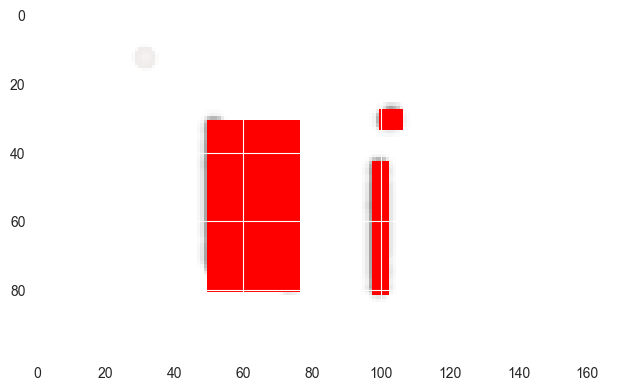

In [184]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.feature import hog
from skimage.measure import label, regionprops
from skimage.draw import rectangle
import joblib

# Load the trained model
model = joblib.load('svm_model4.pkl')

# Load the image of the word
image = imread('img_9.png')

# Convert the image to grayscale
gray = rgb2gray(image)

# Define the size of each letter
letter_size = (100, 100)

# Split the word into letters and predict each letter using the loaded model
word = ''
for i in range(image.shape[1] // letter_size[1]):
    for j in range(image.shape[0] // letter_size[0]):
        # Extract the letter image from the original image
        letter_image = gray[j*letter_size[0]:(j+1)*letter_size[0], i*letter_size[1]:(i+1)*letter_size[1]]

        # Resize the letter image to a fixed size
        letter_image_resized = resize(letter_image, letter_size)

        # Extract HOG features from the letter image
        letter_features = hog(letter_image_resized, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')

        # Predict the letter using the loaded model
        predicted_letter = model.predict([letter_features])[0]

        # Concatenate the predicted letter to the current word
        word += predicted_letter

# Label the connected components (i.e., letters) in the binary image
label_image = label(gray < 0.5)

# Get the properties of the labeled regions (i.e., letters)
regions = regionprops(label_image)

# Draw rectangles around each region on the original image
for region in regions:
    minr, minc, maxr, maxc = region.bbox
    rr, cc = rectangle((minr, minc), (maxr, maxc), shape=image.shape)
    image[rr, cc, :] = [255, 0, 0] # Draw red rectangles

# Show the image with the rectangles
imshow(image)

In [185]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.feature import hog
from skimage.measure import label, regionprops
import joblib

# Load the trained model
model = joblib.load('svm_model4.pkl')

# Load the image of the word
image = imread('img_9.png')

# Convert the image to grayscale
gray = rgb2gray(image)

# Define the size of each letter
letter_size = (100, 100)

# Threshold the image to binary
binary = gray < 0.5

# Label connected regions in the binary image
labels = label(binary)

# Initialize the final word string
word = ''

# Loop over each connected region
for region in regionprops(labels):

    # Extract the bounding box of the region
    min_row, min_col, max_row, max_col = region.bbox

    # Extract the region from the original image
    region_image = gray[min_row:max_row, min_col:max_col]

    # Resize the region to a fixed size
    region_image_resized = resize(region_image, letter_size)

    # Extract HOG features from the region image
    region_features = hog(region_image_resized, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')

    # Predict the letter using the loaded model
    predicted_letter = model.predict([region_features])[0]

    # Concatenate the predicted letter to the current word
    word += predicted_letter

print(word)

ZZW


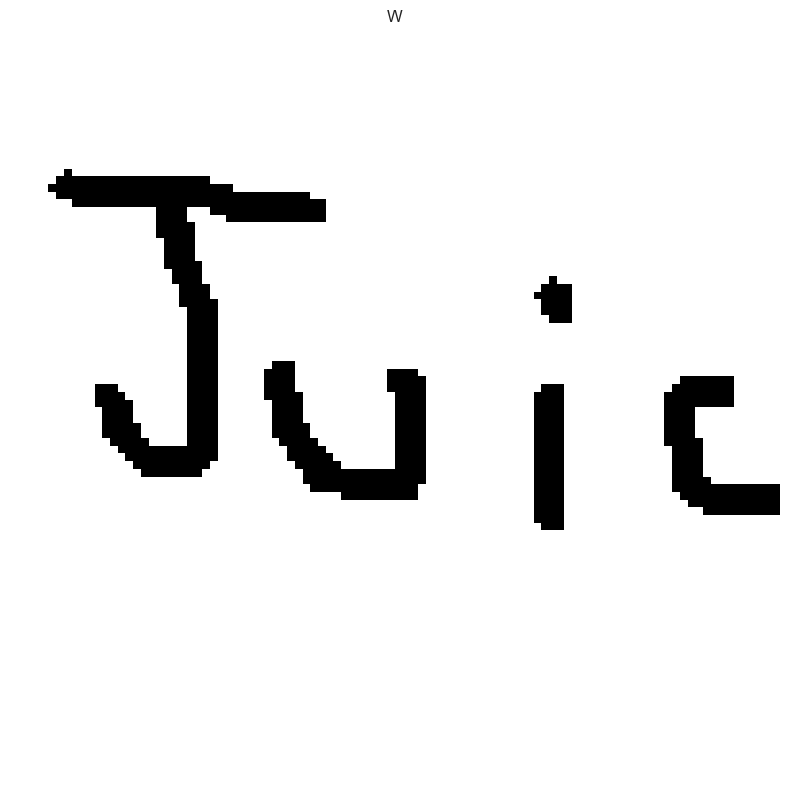

In [197]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.feature import hog
import joblib
import matplotlib.pyplot as plt

# Load the trained model
model = joblib.load('svm_model3.pkl')

# Load the image of the word
image = imread('img_10.png')

# Convert the image to grayscale
gray = rgb2gray(image)

# Define the size of each letter
letter_size = (100, 100)

# Split the word into letters and predict each letter using the loaded model
letters = []
for i in range(image.shape[1] // letter_size[1]):
    for j in range(image.shape[0] // letter_size[0]):
        # Extract the letter image from the original image
        letter_image = gray[j*letter_size[0]:(j+1)*letter_size[0], i*letter_size[1]:(i+1)*letter_size[1]]

        # Resize the letter image to a fixed size
        letter_image_resized = resize(letter_image, letter_size)

        # Extract HOG features from the letter image
        letter_features = hog(letter_image_resized, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')

        # Predict the letter using the loaded model
        predicted_letter = model.predict([letter_features])[0]

        # Add the letter image and the predicted letter to the list
        letters.append((letter_image_resized, predicted_letter))

# Plot the letter images
fig, axs = plt.subplots(1, len(letters), figsize=(10, 10))
axs = [axs] if len(letters) == 1 else axs
for i, (letter_image, predicted_letter) in enumerate(letters):
    axs[i].imshow(letter_image, cmap='gray')
    axs[i].set_title(predicted_letter)
    axs[i].axis('off')

plt.show()


In [20]:
import numpy as np
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage.transform import resize

# Load the image of the word
image = imread('img_9.png')

# Convert the image to grayscale
gray = rgb2gray(image)

# Compute the binary image by thresholding with Otsu's method
thresh = threshold_otsu(gray)
binary = gray > thresh

# Label connected regions in the binary image
labels = label(binary)

# Get the regions corresponding to each letter
letter_regions = []
for region in regionprops(labels):
    # Ignore small regions
    if region.area < 100:
        continue

    # Extract the bounding box of the region
    min_row, min_col, max_row, max_col = region.bbox

    # Extract the letter image from the original image
    letter_image = image[min_row:max_row, min_col:max_col]

    # Resize the letter image to a fixed size
    letter_image_resized = resize(letter_image, (100, 100), anti_aliasing=True)

    # Make sure the letter image has 3 channels
    if len(letter_image_resized.shape) < 3:
        letter_image_resized = np.repeat(letter_image_resized[:, :, np.newaxis], 3, axis=2)

    letter_regions.append((letter_image_resized, ''))

# Display the letter images
for letter_image, _ in letter_regions:
    imsave('letter_{}.png'.format(i), letter_image)

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

MIN_CONTOUR_AREA = 10
img = cv2.imread("img_9.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blured = cv2.blur(gray, (5,5), 0)
img_thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 10))
threshed = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, rect_kernel)
Contours, Hierarchy = cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in Contours:
    if cv2.contourArea(contour) > MIN_CONTOUR_AREA:
        [X, Y, W, H] = cv2.boundingRect(contour)
        cv2.rectangle(img, (X, Y), (X + W, Y + H), (0,0,255), 2)
cv2.imshow('contour', img)

48

In [1]:
import cv2

# Read the image
img = cv2.imread('img_9.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to separate foreground and background
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours of the letters
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through each contour and extract the corresponding letter
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    letter = gray[y:y+h, x:x+w]
    cv2.imwrite(f'letter_{i}.jpg', letter)

In [74]:
import cv2
from PIL import Image
import joblib
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.feature import hog

# Load the trained model
model = joblib.load('svm_model5.pkl')
win_size = (100, 100)
letters = []

# Read the image
img = cv2.imread('images/img037-001.png')
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to separate foreground and background
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Apply morphological operations to handle letters with white space
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph = cv2.erode(thresh, kernel, iterations=2)
morph = cv2.dilate(morph, kernel, iterations=2)

# Find contours of the letters
contours, hierarchy = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours based on x-coordinate values
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
word = ''
# Loop through each contour and extract the corresponding letter
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    letter_img = gray[y:y+h, x:x+w]


    resized_img = cv2.resize(letter_img, win_size)
    resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_GRAY2RGB)

    # Compute the HOG features for the resized image
    hog_features = hog(resized_img_rgb, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', channel_axis=-1)

    # Reshape the feature vector to match the expected input shape of the SVC model
    hog_features = hog_features.reshape(1, -1)

    # Predict the corresponding letter using the trained SVC model
    letter = model.predict(hog_features)[0]
    letters.append(letter)


    #save the letter
    cv2.imwrite(f'images/letter_{i}.png', resized_img_rgb)

print(''.join(letters))



D


In [77]:
import cv2
from PIL import Image
import joblib
import os
from skimage import io
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.feature import hog

# Load the trained model
model = joblib.load('svm_model5.pkl')
win_size = (100, 100)
letters = []

# Read the image

image_dir = '/Users/metoditarnev/Desktop/letters/resized_img_sorted'
for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        image_path = f"{image_dir}/{filename}"
        img = io.imread(image_path)

# Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to separate foreground and background
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Apply morphological operations to handle letters with white space
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    morph = cv2.erode(thresh, kernel, iterations=2)
    morph = cv2.dilate(morph, kernel, iterations=2)

# Find contours of the letters
    contours, hierarchy = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours based on x-coordinate values
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
    word = ''
# Loop through each contour and extract the corresponding letter

    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        letter_img = gray[y:y+h, x:x+w]


        resized_img = cv2.resize(letter_img, win_size)
        resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_GRAY2RGB)

    # Compute the HOG features for the resized image
        hog_features = hog(resized_img_rgb, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', channel_axis=-1)

    # Reshape the feature vector to match the expected input shape of the SVC model
        hog_features = hog_features.reshape(1, -1)

    #save the letter in this folder : /Users/metoditarnev/Desktop/letters/imagesTest
        cv2.imwrite(f'/Users/metoditarnev/Desktop/letters/imagesTest/{filename}', resized_img_rgb)



In [81]:
import cv2
from PIL import Image
import joblib
import os
from skimage import io
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.feature import hog

# Load the trained model
model = joblib.load('svm_model5.pkl')
win_size = (100, 100)
letters = []

# Read the image

image_dir = '/Users/metoditarnev/Desktop/letters/resized_img_sorted'
for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        image_path = f"{image_dir}/{filename}"
        img = io.imread(image_path)

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply adaptive thresholding to separate foreground and background
        thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

        # Apply closing operation to fill in gaps between the dot and line in letters like "i" and "j"
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

        # Find contours of the letters
        contours, hierarchy = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Sort contours based on x-coordinate values
        contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
        word = ''

        # Loop through each contour and extract the corresponding letter
        for i, contour in enumerate(contours):
            x, y, w, h = cv2.boundingRect(contour)
            letter_img = gray[y:y+h, x:x+w]

            resized_img = cv2.resize(letter_img, win_size)
            resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_GRAY2RGB)

            # Compute the HOG features for the resized image
            hog_features = hog(resized_img_rgb, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', channel_axis=-1)

            # Reshape the feature vector to match the expected input shape of the SVC model
            hog_features = hog_features.reshape(1, -1)

            # Save the letter in this folder : /Users/metoditarnev/Desktop/letters/imagesTest
            cv2.imwrite(f'/Users/metoditarnev/Desktop/letters/imagesTest/{filename}', resized_img_rgb)



In [80]:
import cv2
from PIL import Image
import joblib
import os
from skimage import io
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.feature import hog

# Load the trained model
model = joblib.load('svm_model5.pkl')
win_size = (100, 100)
letters = []

# Read the image

image_dir = '/Users/metoditarnev/Desktop/letters/resized_img_sorted'
for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        image_path = f"{image_dir}/{filename}"
        img = io.imread(image_path)

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply adaptive thresholding to separate foreground and background
        thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

        # Apply morphological operations to handle letters with white space
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
        morph = cv2.erode(thresh, kernel, iterations=2)
        morph = cv2.dilate(morph, kernel, iterations=2)

        # Find contours of the letters
        contours, hierarchy = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Sort contours based on x-coordinate values
        contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
        word = ''
        # Loop through each contour and extract the corresponding letter
        for i, contour in enumerate(contours):
            x, y, w, h = cv2.boundingRect(contour)

            # Check if the contour is a small dot contained inside another contour
            if w < 10 and h < 10:
                for j, other_contour in enumerate(contours):
                    if i != j:
                        other_x, other_y, other_w, other_h = cv2.boundingRect(other_contour)
                        if other_x <= x and other_y <= y and other_x+other_w >= x+w and other_y+other_h >= y+h:
                            # Adjust the bounding box to include the line as well
                            x = other_x
                            y = other_y
                            w = other_w
                            h = other_h

            letter_img = gray[y:y+h, x:x+w]

            resized_img = cv2.resize(letter_img, win_size)
            resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_GRAY2RGB)

            # Compute the HOG features for the resized image
            hog_features = hog(resized_img_rgb, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', channel_axis=-1)

            # Reshape the feature vector to match the expected input shape of the SVC model
            hog_features = hog_features.reshape(1, -1)
            #Save
            cv2.imwrite(f'/Users/metoditarnev/Desktop/letters/imagesTest/{filename}', resized_img_rgb)

In [3]:
import cv2
from PIL import Image
import joblib
import os
from skimage import io
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.feature import hog

# Load the trained model
model = joblib.load('svm_model6.pkl')
win_size = (100, 100)
letters = []

# Read the image

img = cv2.imread('images/img_9.png')


# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to separate foreground and background
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Apply morphological operations to handle letters with white space
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph = cv2.erode(thresh, kernel, iterations=2)
morph = cv2.dilate(morph, kernel, iterations=2)

# Perform a closing operation to connect the dot to the line of the letter
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50,50))
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)

# Find contours of the letters
contours, hierarchy = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours based on x-coordinate values
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
word = ''
# Loop through each contour and extract the corresponding letter

for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        letter_img = gray[y:y+h, x:x+w]


        resized_img = cv2.resize(letter_img, win_size)
        resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_GRAY2RGB)

    # Compute the HOG features for the resized image
        hog_features = hog(resized_img_rgb, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', channel_axis=-1)

    # Reshape the feature vector to match the expected input shape of the SVC model
        hog_features = hog_features.reshape(1, -1)
        #predict the letter
        letter = model.predict(hog_features)[0]
        letters.append(letter)
        #Save the image
        cv2.imwrite(f'/Users/metoditarnev/Desktop/{letter}_test.png', resized_img_rgb)
print('Pedicted word: ')
print(''.join(letters))

Pedicted word: 
ni


In [13]:
from PIL import Image
import numpy as np
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage.color import rgb2gray
from skimage.transform import resize
import joblib

# Load the trained model
model = joblib.load('svm_model6.pkl')
win_size = (100, 100)
letters = []

# Read the image and convert to grayscale
img = Image.open('images/img_9.png').convert('RGB')
img_gray = rgb2gray(np.array(img))

# Apply thresholding to separate foreground and background
thresh = threshold_otsu(img_gray)
binary = img_gray > thresh

# Label connected components
labelled = label(binary)

# Loop through each connected component and extract the corresponding letter
for region in regionprops(labelled):
    # Skip small regions
    if region.area < 50:
        continue

    # Extract bounding box of region
    min_row, min_col, max_row, max_col = region.bbox

    # Crop the region and resize to fixed size
    letter_img = resize(img_gray[min_row:max_row, min_col:max_col], win_size)

    # Compute the HOG features for the resized image
    hog_features = hog(letter_img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True)

    # Reshape the feature vector to match the expected input shape of the SVC model
    hog_features = hog_features.reshape(1, -1)

    # Predict the letter
    letter = model.predict(hog_features)[0]
    letters.append(letter)

    # Save the image
    Image.fromarray((letter_img * 255).astype(np.uint8)).save(f'{letter}_test.png')

# Print the predicted word
print('Predicted word: ', ''.join(letters))


Predicted word:  W


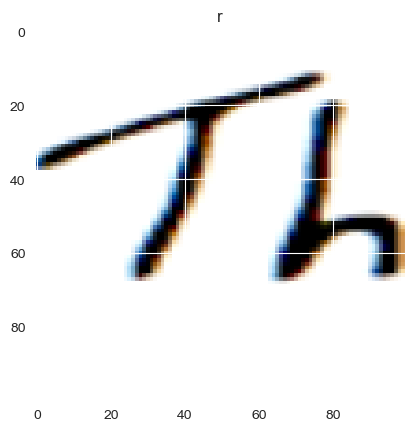

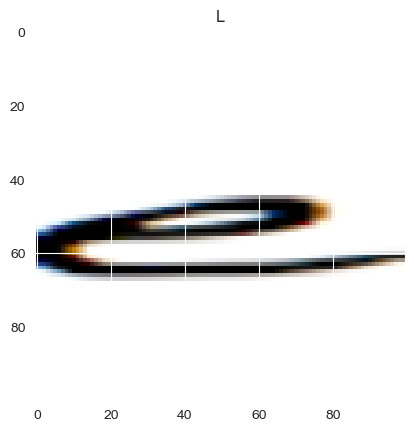

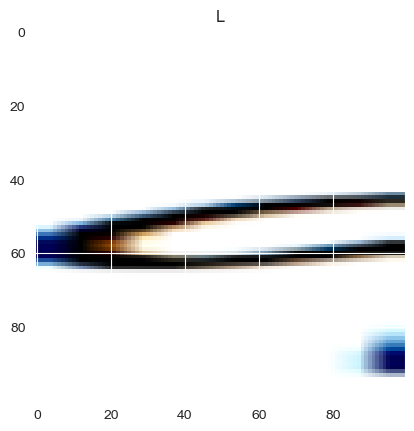

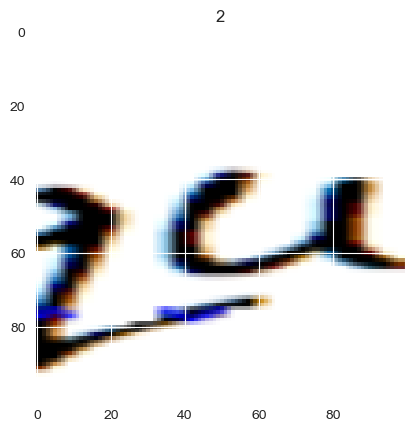

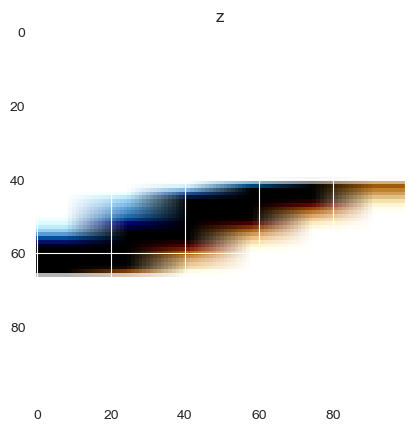

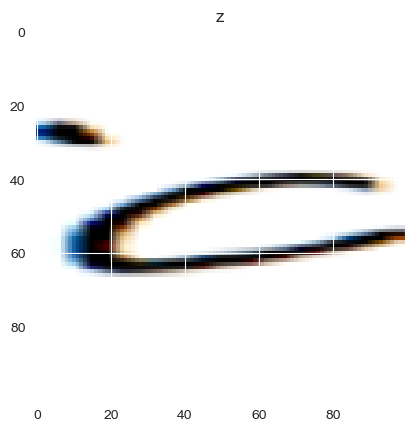

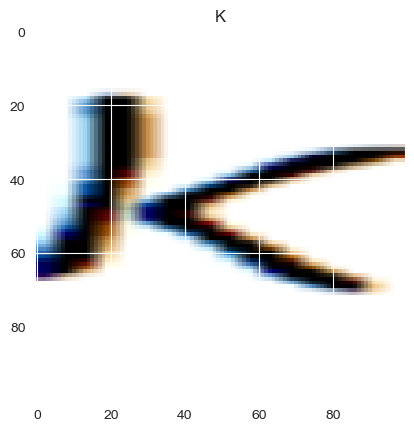

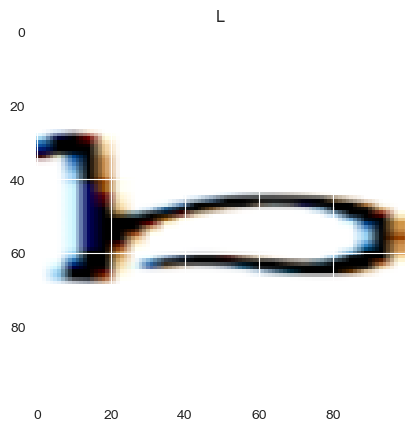

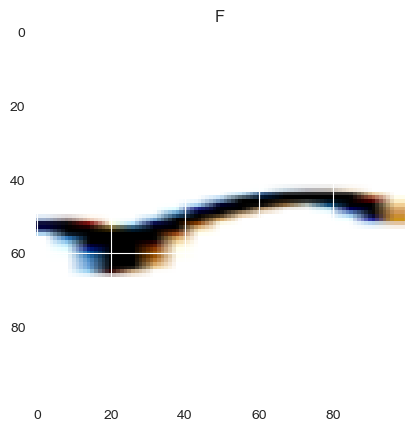

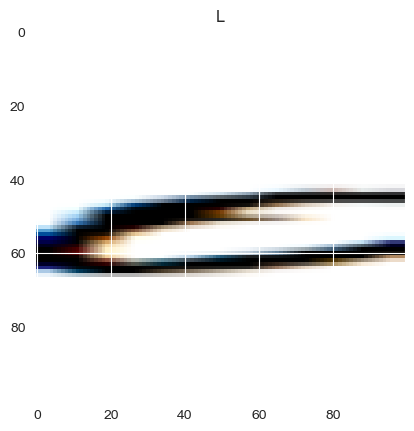

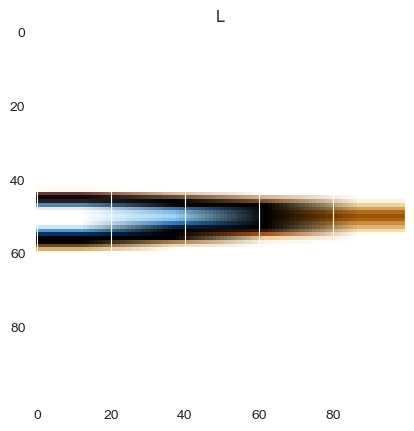

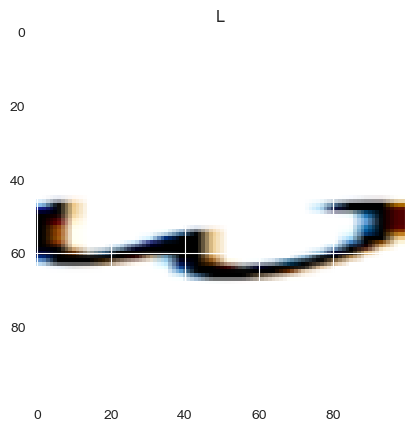

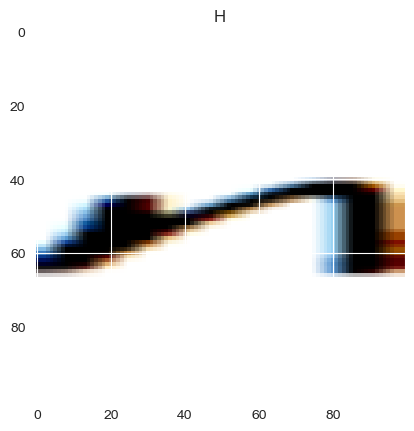

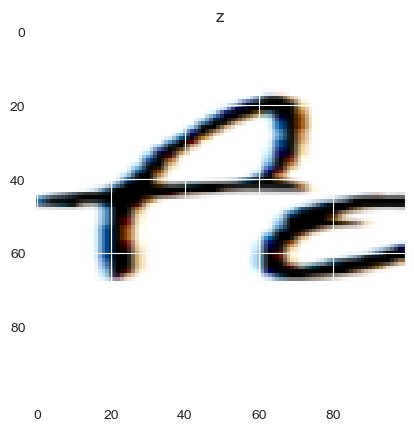

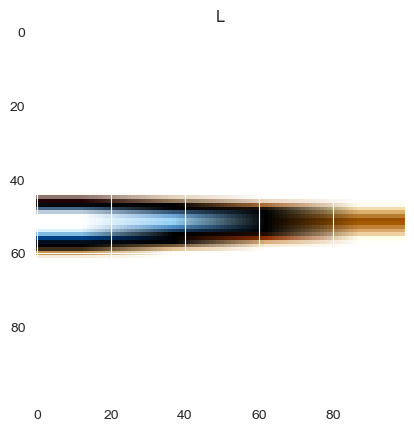

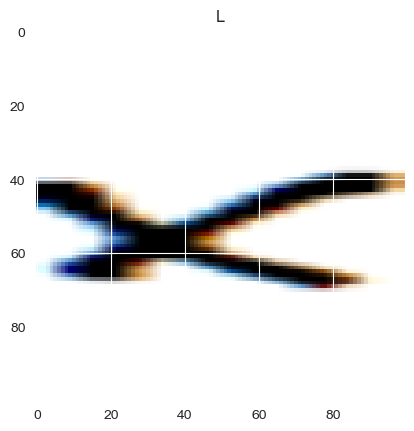

Predicted word:  rLL2zzKLFLLLHzLL


In [1]:
import cv2
from PIL import Image
import joblib
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.feature import hog
import os

import numpy as np

# read input image
img = cv2.imread('images/d2.png')
# Load the trained model
model = joblib.load('svm_model7.pkl')
# define window size
win_size = (100, 100)

letters = []

# define border color
lower = (0, 80, 110)
upper = (0, 120, 150)

# threshold on border color
mask = cv2.inRange(img, lower, upper)

# dilate threshold
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 100))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)

# recolor border to white
img[mask==255] = (255,255,255)

# convert img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# otsu threshold
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU )[1]

# apply morphology open
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,100))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
morph = 255 - morph

# find contours and bounding boxes
bboxes = []
bboxes_img = img.copy()
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(bboxes_img, (x, y), (x+w, y+h), (0, 0, 255), 1)
    bboxes.append((x,y,w,h))


# get largest width of bboxes
maxwidth = max(bboxes)[2]

# sort bboxes on x coordinate
def takeFirst(elem):
    return elem[0]

bboxes.sort(key=takeFirst)

# stack cropped boxes with 10 pixels padding all around
result = np.full((1,maxwidth+10,3), (255,255,255), dtype=np.uint8)
crops = []
for bbox in bboxes:
    (x,y,w,h) = bbox
    crop = img[y:y+h, x:x+w]
    resized_img = cv2.resize(crop, win_size)
    gray = rgb2gray(resized_img)
    crops.append(resized_img)


    # Compute the HOG features for the resized image
    hog_features = hog(gray, orientations=12,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True
                       )

    #shape the feature vector to match the expected input shape of the SVC model
    hog_features = hog_features.reshape(1, -1)
    #predict the letter
    letter = model.predict(hog_features)[0]
    letters.append(letter)

# save result



# plot crops one by one
for i, crop in enumerate(crops):
    plt.imshow(crop)
    plt.title(letters[i])
    plt.show()





print('Predicted word: ', ''.join(letters))


# Big Text segmentation into words

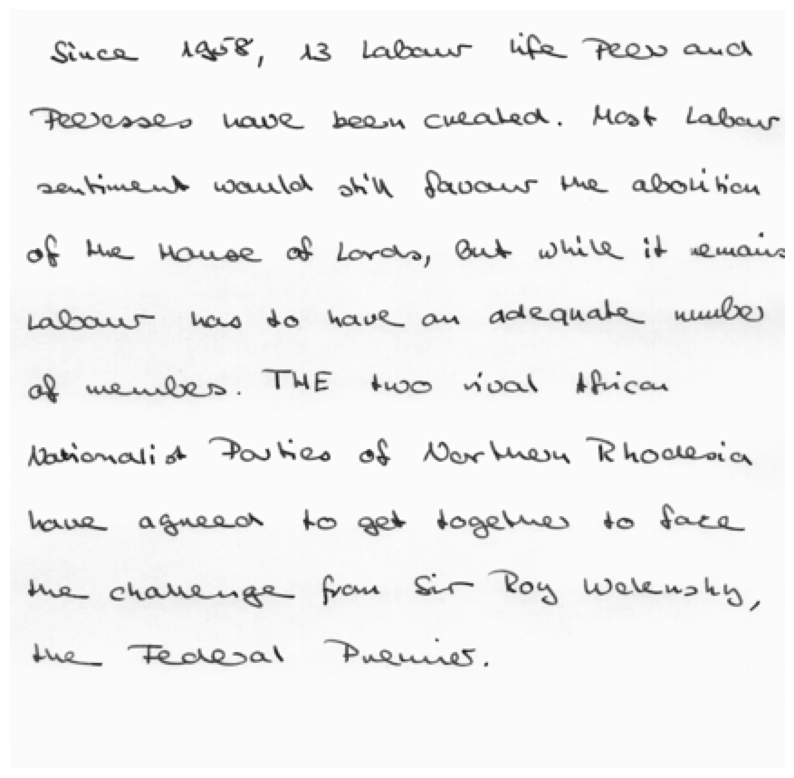

In [4]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# read the image, check if its 3 channel or grayscale, based on
# that convert to grayscale
textImage = imread("images/img_20.png")
if textImage.ndim > 2: # is this is a rgb/rgba image
    textImage = rgb2gray(textImage)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(textImage, cmap="gray")
plt.show() # preview

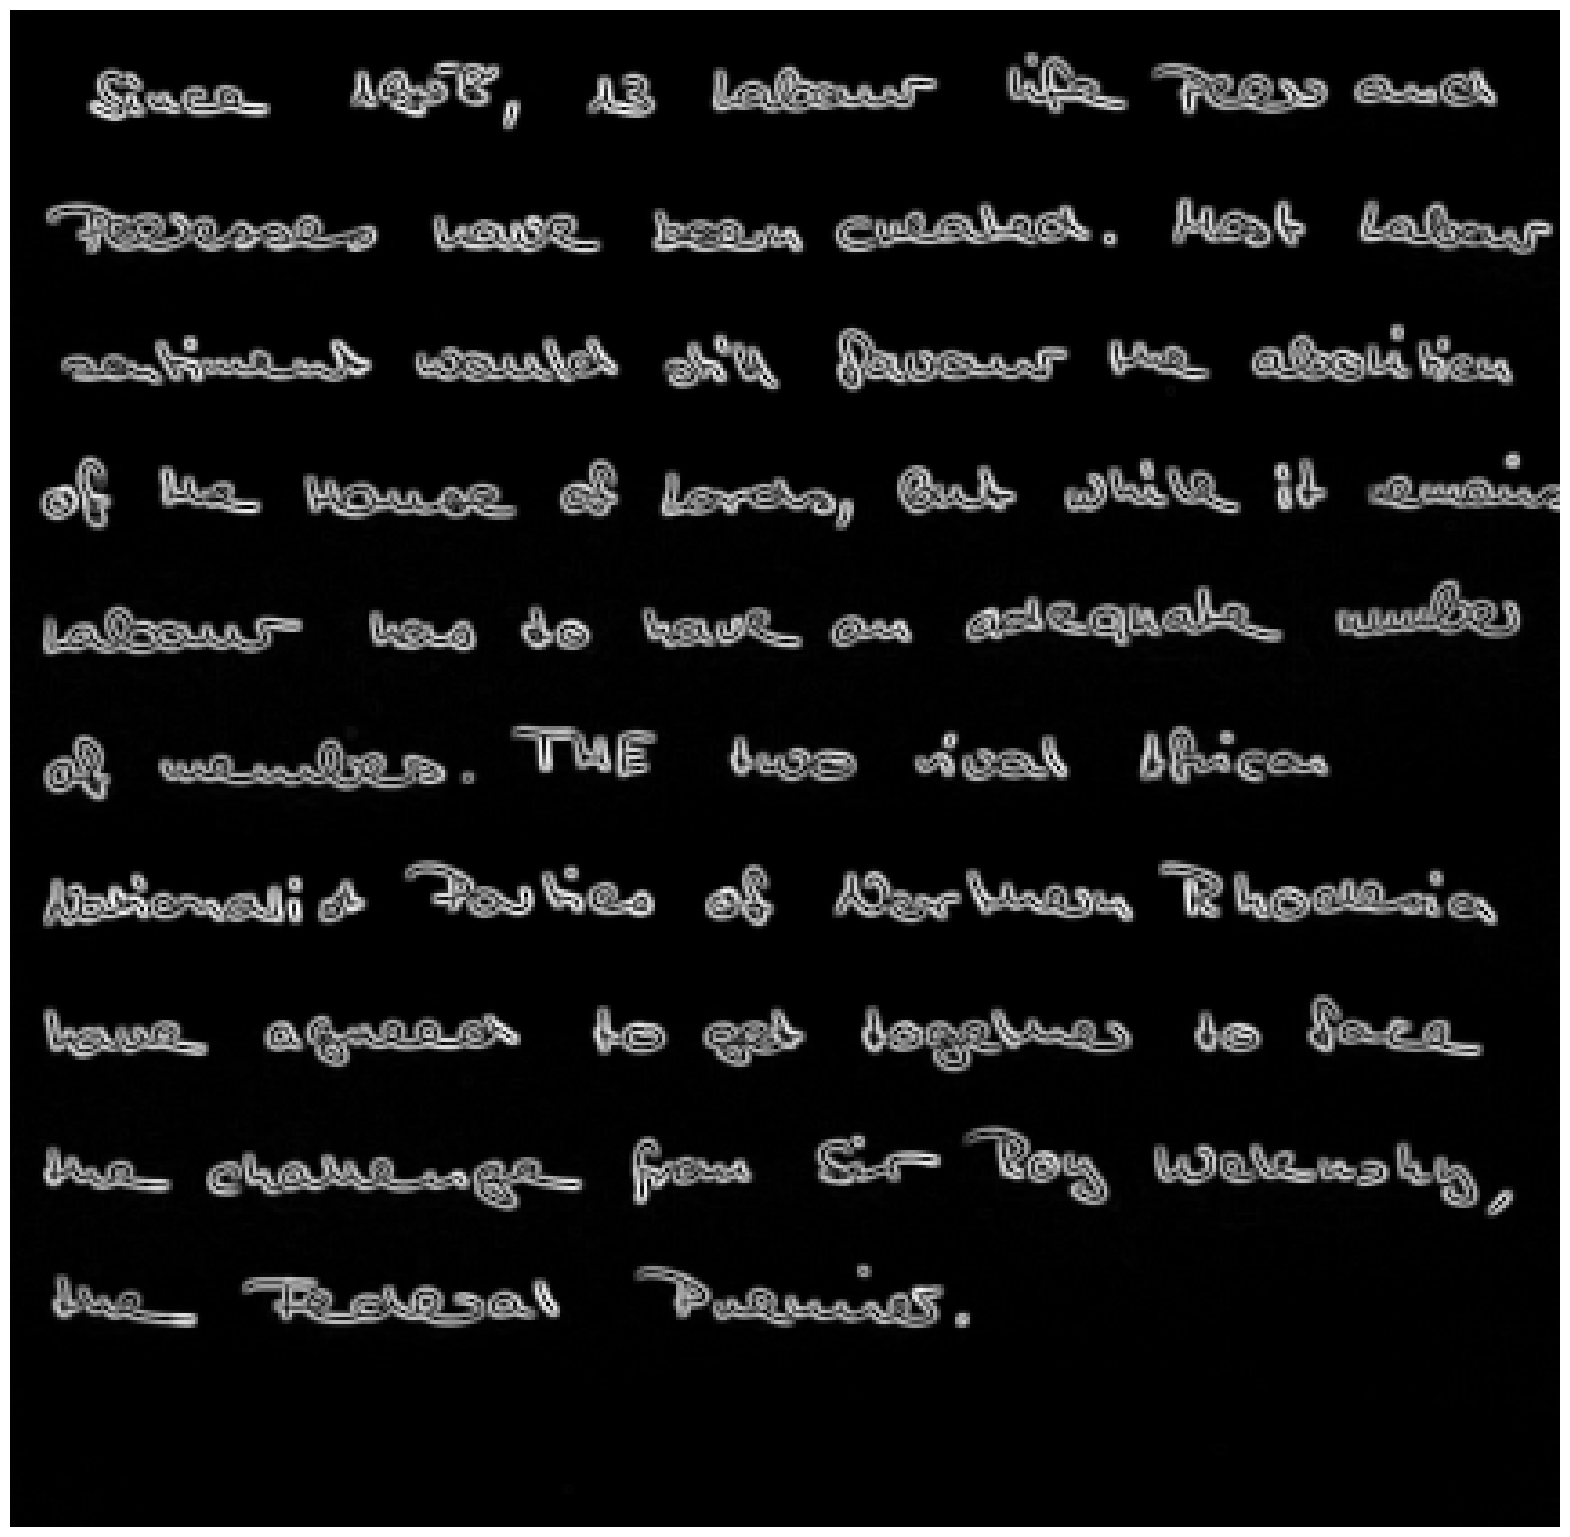

In [5]:
from skimage.filters import sobel
sobel_image = sobel(textImage)
plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(sobel_image, cmap="gray")
plt.show()

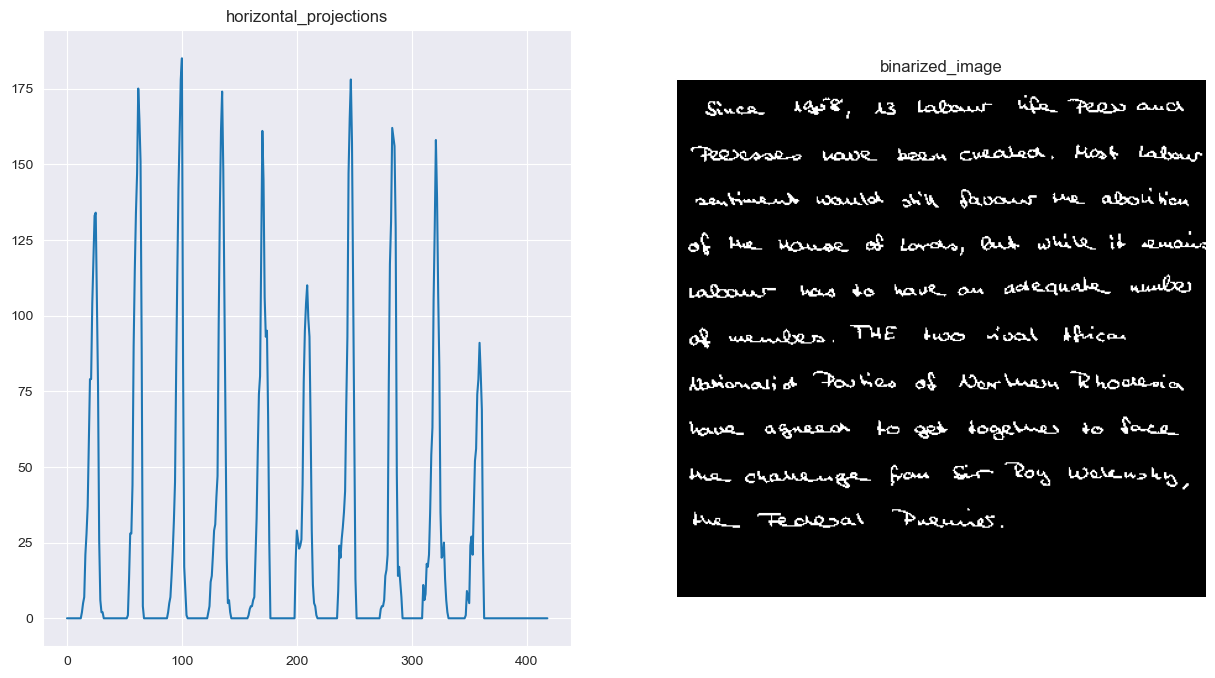

In [6]:
from skimage.filters import threshold_otsu
import numpy as np

def horizontal_projections(sobel_image):
    return np.sum(sobel_image, axis=1)

def binarize_image(image):
    threshold = threshold_otsu(textImage)
    return image < threshold

binarized_image = binarize_image(textImage)
hpp = horizontal_projections(binarized_image)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax1.set_title("horizontal_projections")
ax1.plot(hpp)

ax2.axis("off")
ax2.set_title("binarized_image")
ax2.imshow(binarized_image, cmap="gray")

plt.show()

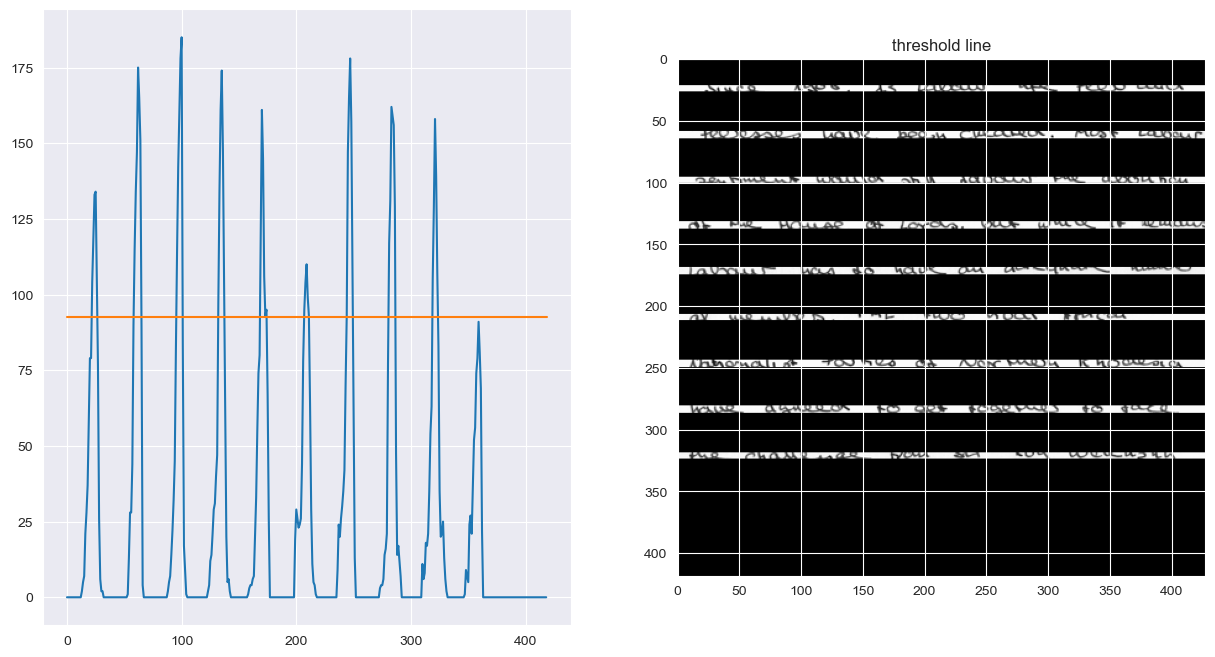

In [7]:
# find the midway where we can make a threshold and extract the peaks regions
def find_peak_regions(hpp, threshold):

    peaks = []
    for i, hppv in enumerate(hpp):
        if hppv < threshold:
            peaks.append([i, hppv])
    return peaks

# find the threshold from where anything above is considered a peak region
# using the average for now but this needs further research. This may or may not work on all images.
threshold = (np.max(hpp)-np.min(hpp))/2
peaks = find_peak_regions(hpp, threshold)

peaks_indexes = np.array(peaks)[:, 0].astype(int)

segmented_img = np.copy(textImage)
r, c = segmented_img.shape
for ri in range(r):
    if ri in peaks_indexes:
        segmented_img[ri, :] = 0

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax1.plot(hpp)
ax2.set_title("threshold line")
ax1.plot([0, textImage.shape[0]], [threshold, threshold,])
ax2.imshow(segmented_img, cmap="gray")
plt.show()

In [8]:


# group the peaks through which we will be doing path planning.
diff_between_consec_numbers = np.diff(peaks_indexes) # difference between consecutive numbers
indexes_with_larger_diff = np.where(diff_between_consec_numbers > 1)[0].flatten()
peak_groups = np.split(peaks_indexes, indexes_with_larger_diff)
# remove very small regions, these are basically errors in algorithm because of our threshold value
peak_groups = [item for item in peak_groups if len(item) > 10]
print("peak groups found", len(peak_groups))



peak groups found 10


In [9]:
#a star path planning algorithm
from heapq import *

def heuristic(a, b):
    return (b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2

def astar(array, start, goal):

    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []

    heappush(oheap, (fscore[start], start))

    while oheap:

        current = heappop(oheap)[1]

        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue

            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heappush(oheap, (fscore[neighbor], neighbor))

    return []


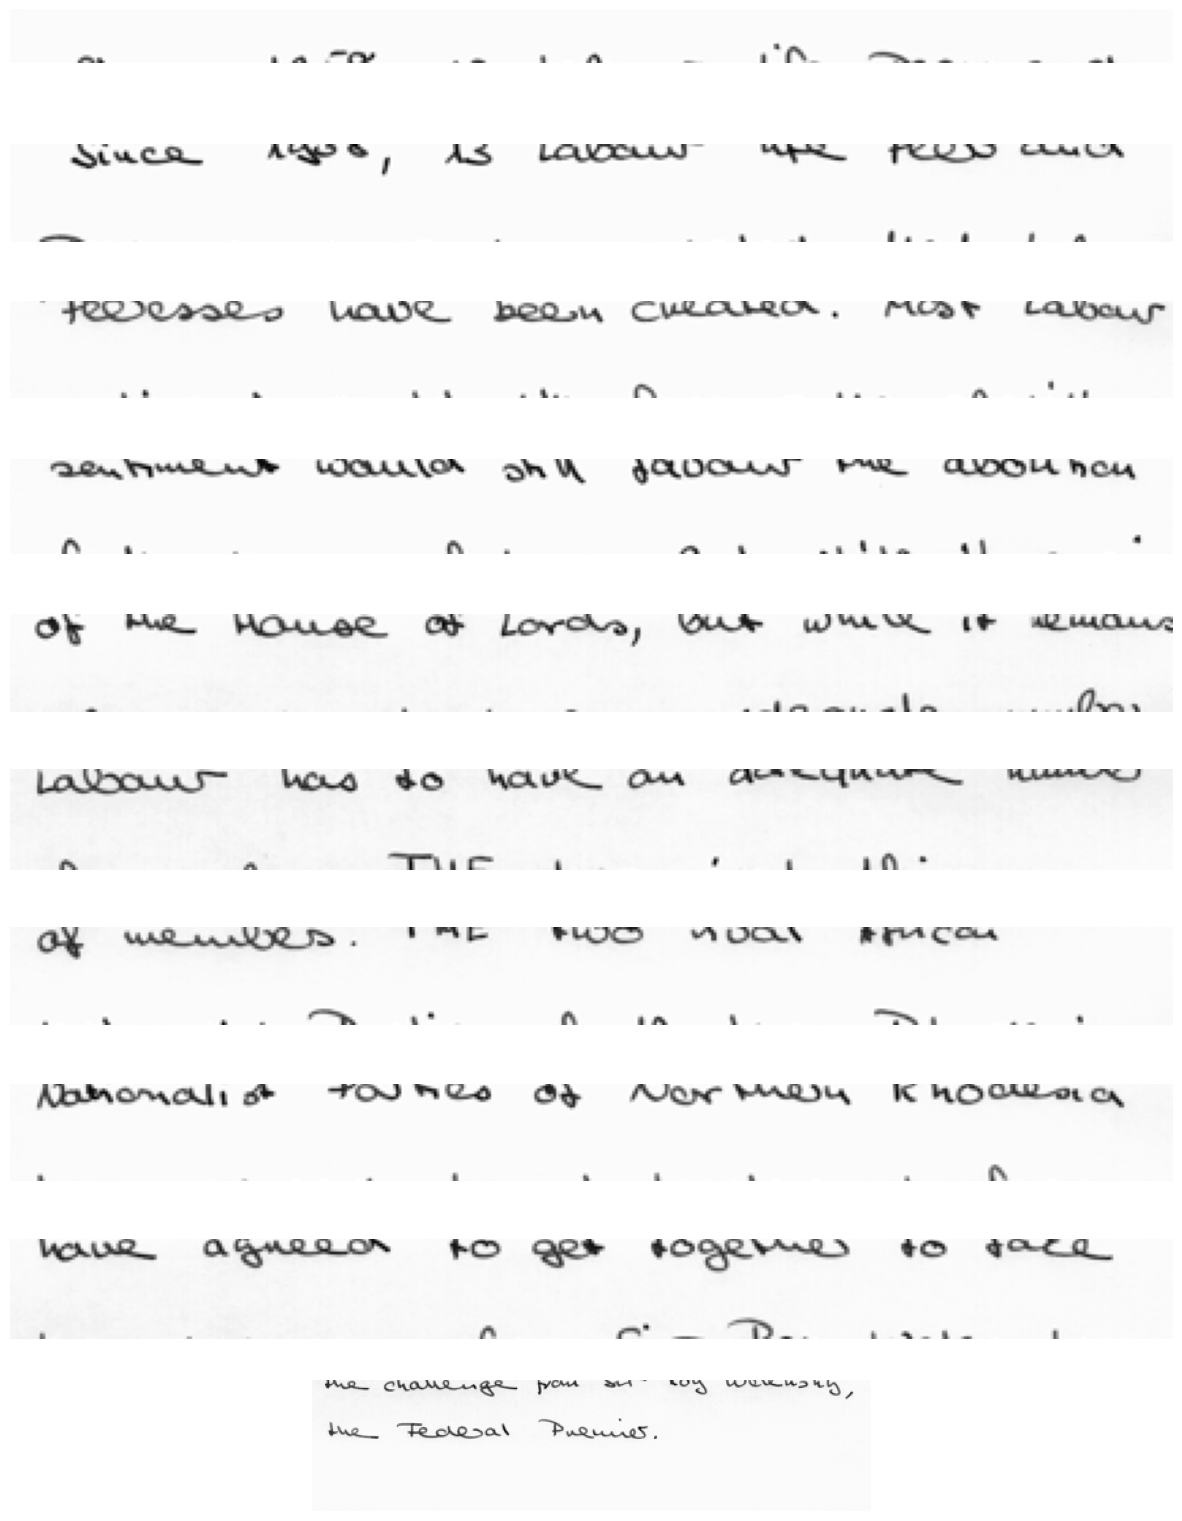

In [10]:


# Visualize the peak images
fig, ax = plt.subplots(nrows=len(peak_groups), ncols=1, figsize=(15,20))
for index, sub_image_index in enumerate(peak_groups):
    sub_image = textImage[sub_image_index[0]:sub_image_index[-1]]
    ax[index].axis("off")
    ax[index].imshow(sub_image, cmap="gray")
plt.show()



In [11]:


# now that everything is cleaner, its time to segment all the lines using the A* algorithm
def get_binary(textImage):
    mean = np.mean(textImage)
    if mean == 0.0 or mean == 1.0:
        return textImage

    thresh = threshold_otsu(textImage)
    binary = textImage <= thresh
    binary = binary * 1
    return binary

binary_image = get_binary(textImage)
segment_separating_lines = []
for i, sub_image_index in enumerate(peak_groups):
    nmap = binary_image[sub_image_index[0]:sub_image_index[-1]]
    path = np.array(astar(nmap, (int(nmap.shape[0]/2), 0), (int(nmap.shape[0]/2),nmap.shape[1]-1)))
    offset_from_top = sub_image_index[0]
    path[:,0] += offset_from_top
    segment_separating_lines.append(path)



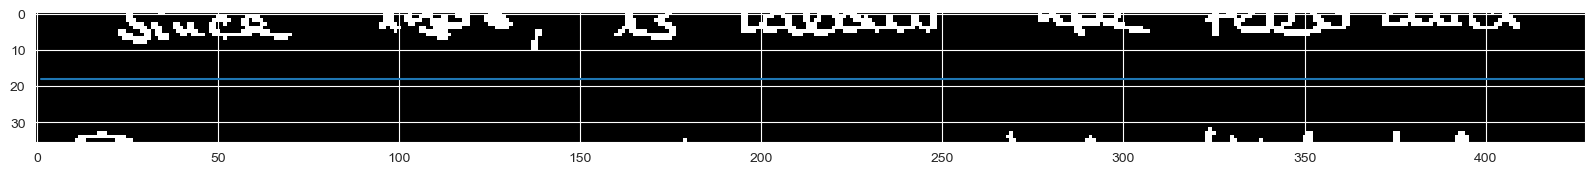

In [12]:


# visualize a sample
cluster_of_interest = peak_groups[1]
offset_from_top = cluster_of_interest[0]
nmap = binary_image[cluster_of_interest[0]:cluster_of_interest[-1],:]
plt.figure(figsize=(20,20))
plt.imshow(nmap, cmap="gray")

path = np.array(astar(nmap, (int(nmap.shape[0]/2), 0), (int(nmap.shape[0]/2),nmap.shape[1]-1)))
plt.plot(path[:,1], path[:,0])



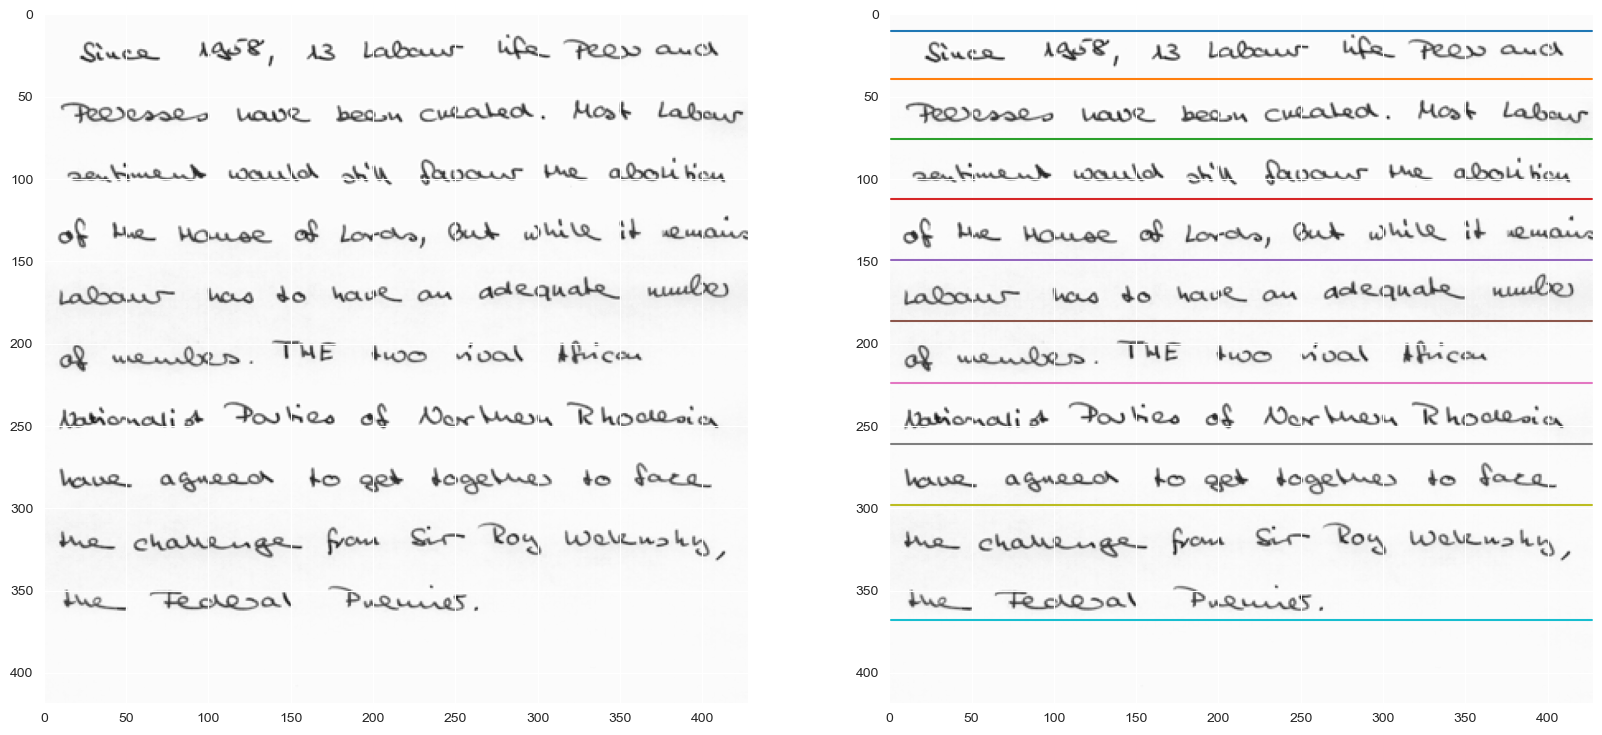

In [13]:
offset_from_top = cluster_of_interest[0]
fig, ax = plt.subplots(figsize=(20,10), ncols=2)
for path in segment_separating_lines:
    ax[1].plot((path[:,1]), path[:,0])
ax[1].imshow(textImage, cmap="gray")
ax[0].imshow(textImage, cmap="gray")

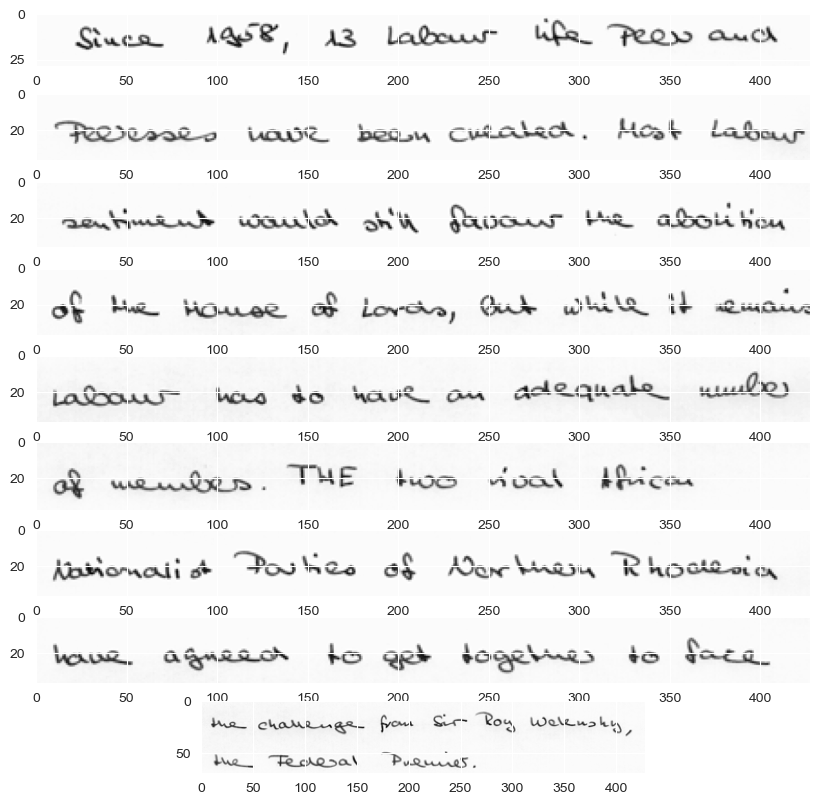

In [14]:
# TODO: the below splitting image algorithm is too simple
# I need to write a cleaner one.

seperated_images = []
for index, line_segments in enumerate(segment_separating_lines):
    if index < len(segment_separating_lines)-1:
        lower_line = np.min(segment_separating_lines[index][:,0])
        upper_line = np.max(segment_separating_lines[index+1][:,0])
        seperated_images.append(textImage[lower_line:upper_line])

# visualize it
fig, ax = plt.subplots(figsize=(10,10), nrows=len(seperated_images))
for index, line_image in enumerate(seperated_images):
    ax[index].imshow(line_image, cmap="gray")

plt.show()

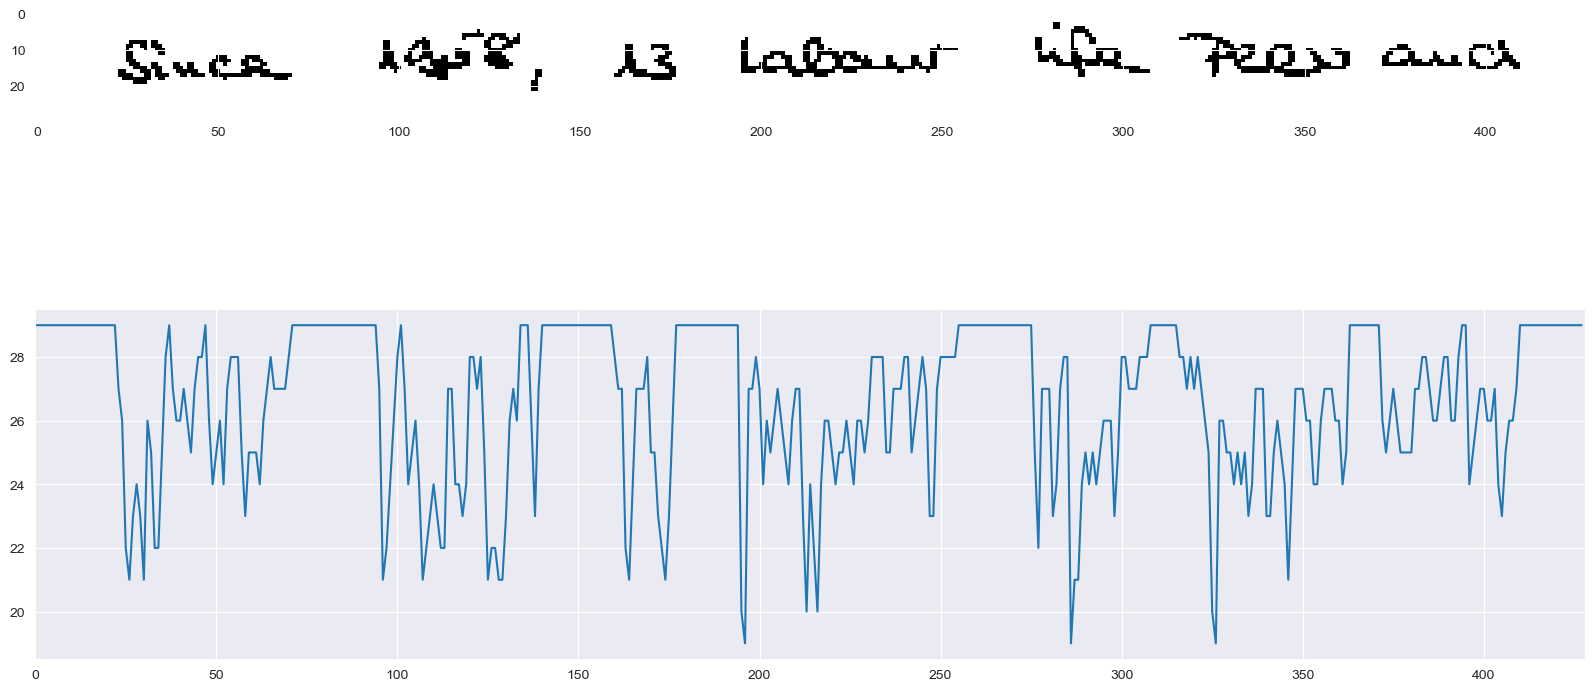

In [15]:


from skimage.filters import threshold_otsu

#binarize the image, guassian blur will remove any noise in the image
first_line = seperated_images[0]
thresh = threshold_otsu(first_line)
binary = first_line > thresh

# find the vertical projection by adding up the values of all pixels along rows
vertical_projection = np.sum(binary, axis=0)

# plot the vertical projects
fig, ax = plt.subplots(nrows=2, figsize=(20,10))
plt.xlim(0, first_line.shape[1])
ax[0].imshow(binary, cmap="gray")
ax[1].plot(vertical_projection)



In [16]:


height = first_line.shape[0]

## we will go through the vertical projections and
## find the sequence of consecutive white spaces in the image
whitespace_lengths = []
whitespace = 0
for vp in vertical_projection:
    if vp == height:
        whitespace = whitespace + 1
    elif vp != height:
        if whitespace != 0:
            whitespace_lengths.append(whitespace)
        whitespace = 0 # reset whitepsace counter.

print("whitespaces:", whitespace_lengths)
avg_white_space_length = np.mean(whitespace_lengths)
print("average whitespace lenght:", avg_white_space_length)



whitespaces: [23, 1, 1, 24, 1, 3, 20, 18, 21, 8, 9, 2]
average whitespace lenght: 10.916666666666666


In [17]:


## find index of whitespaces which are actually long spaces using the avg_white_space_length
whitespace_length = 0
divider_indexes = []
for index, vp in enumerate(vertical_projection):
    if vp == height:
        whitespace_length = whitespace_length + 1
    elif vp != height:
        if whitespace_length != 0 and whitespace_length > avg_white_space_length:
            divider_indexes.append(index-int(whitespace_length/2))
            whitespace_length = 0 # reset it

print(divider_indexes)



[12, 82, 148, 186, 266, 364]


In [18]:
# lets create the block of words from divider_indexes
divider_indexes = np.array(divider_indexes)
dividers = np.column_stack((divider_indexes[:-1],divider_indexes[1:]))

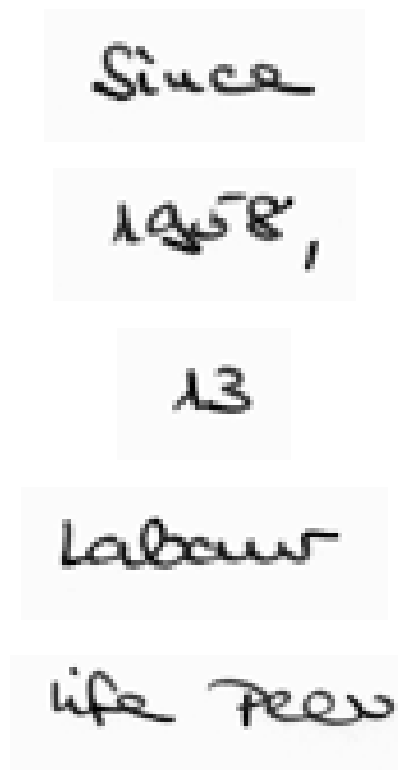

In [19]:
# now plot the findings
fig, ax = plt.subplots(nrows=len(dividers), figsize=(5,10))
for index, window in enumerate(dividers):
    ax[index].axis("off")
    ax[index].imshow(first_line[:,window[0]:window[1]], cmap="gray")

# Character Segmentation

In [ ]:

import sys
#sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages') # in order to import cv2 under python3
import cv2
#sys.path.append('/opt/ros/kinetic/lib/python2.7/dist-packages') # append back in order to import rospy
import numpy as np
import matplotlib.pyplot as plt
import os
#np.set_printoptions(threshold=np.nan)


def showimages():
    cv2.imshow("Result Image", src_img)
    cv2.imshow("Binary Image", bin_img)
    cv2.imshow("Segment Image", final_thr)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


def line_array(array):
    list_x_upper = []
    list_x_lower = []
    for y in range(5, len(array)-5):
        s_a, s_p = strtline(y, array)
        e_a, e_p = endline(y, array)
        print(str(s_a) + ',' + str(s_p) + ',' + str(e_a) + ',' + str(e_p) + ',' + str(y))
        if s_a>=7 and s_p>=5:
            list_x_upper.append(y)
        # bin_img[y][:] = 255
        if e_a>=5 and e_p>=7:
            list_x_lower.append(y)
            # bin_img[y][:] = 255
    return list_x_upper, list_x_lower

def strtline(y, array):
    count_ahead = 0
    count_prev = 0
    for i in array[y:y+10]:
        if i > 3:
            count_ahead+= 1
    for i in array[y-10:y]:
        if i == 0:
            count_prev += 1
    return count_ahead, count_prev

def endline(y, array):
    count_ahead = 0
    count_prev = 0
    for i in array[y:y+10]:
        if i==0:
            count_ahead+= 1
    for i in array[y-10:y]:
        if i >3:
            count_prev += 1
    return count_ahead, count_prev

def endline_word(y, array, a):
    count_ahead = 0
    count_prev = 0
    for i in array[y:y+2*a]:
        if i < 2:
            count_ahead+= 1
    for i in array[y-a:y]:
        if i > 2:
            count_prev += 1
    return count_prev ,count_ahead

def end_line_array(array, a):
    list_endlines = []
    for y in range(len(array)):
        e_p, e_a = endline_word(y, array, a)
        #print(e_p, e_a)
        if e_a >= int(0.8*a) and e_p >= int(0.7*a):
            list_endlines.append(y)
    return list_endlines

def refine_endword(array):
    refine_list = []
    for y in range(len(array)-1):
        if array[y]+1 < array[y+1]:
            refine_list.append(array[y])
    refine_list.append(array[-1])
    return refine_list


def refine_array(array_upper, array_lower):
    upperlines = []
    lowerlines = []
    for y in range(len(array_upper)-1):
        if array_upper[y] + 5 < array_upper[y+1]:
            upperlines.append(array_upper[y]-10)
    for y in range(len(array_lower)-1):
        if array_lower[y] + 5 < array_lower[y+1]:
            lowerlines.append(array_lower[y]+10)

    upperlines.append(array_upper[-1]-10)
    lowerlines.append(array_lower[-1]+10)

    return upperlines, lowerlines

def letter_width(contours):
    letter_width_sum = 0
    count = 0
    for cnt in contours:
        if cv2.contourArea(cnt) > 20:
            x,y,w,h = cv2.boundingRect(cnt)
            letter_width_sum += w
            count += 1

    return letter_width_sum/count


def end_wrd_dtct(final_local, i, bin_img, mean_lttr_width):
    count_y = np.zeros(shape = width)
    for x in range(width):
        for y in range(final_local[i],final_local[i+1]):
            if bin_img[y][x] == 255:
                count_y[x] += 1
    #end_lines = end_line_array(count_y, int(mean_lttr_width))
    #endlines = refine_endword(end_lines)
    #print(i)
    '''for x in range(len(count_y)):
        if max(count_y[0:x+1]) >= 3 and max(count_y[x:]) >= 3 and (20-np.count_nonzero(count_y[x-10:x+10])) > 6:
            print(x)'''

    contours, hierarchy = cv2.findContours(lines_img[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    letter_width_sum = 0
    count = 0
    for cnt in contours:
        if cv2.contourArea(cnt) > 20:
            x, y, w, h = cv2.boundingRect(cnt)
            letter_width_sum += w
            count += 1
    if count != 0 :
        mean_width = letter_width_sum / count
    else:
        mean_width = 0
    #print(mean_width)
    spaces = []
    line_end = []
    for x in range(len(count_y)):
        number = int(0.5*int(mean_width)) - np.count_nonzero(count_y[x-int(0.25*int(mean_width)):x+int(0.25*int(mean_width))])
        if max(count_y[0:x + 1]) >= 3 and number >= 0.4*int(mean_width):
            spaces.append(x)
        if max(count_y[x:]) <= 2:
            line_end.append(x)
    true_line_end = min(line_end) + 10
    #spaces = refine_endword(spaces)
    #print(spaces)
    #print(true_line_end)
    reti = []
    final_spaces = []
    for j in range(len(spaces)):
        if spaces[j] < true_line_end:
            if spaces[j] == spaces[j-1] + 1:
                reti.append(spaces[j-1])
            elif spaces[j] != spaces[j-1] + 1 and spaces[j-1] == spaces[j-2] +1:
                reti.append(spaces[j-1])
                retiavg = int(sum(reti)/len(reti))
                final_spaces.append(retiavg)
                reti = []
            elif spaces[j] != spaces[j-1] + 1 and spaces[j-1] != spaces[j-2] +1 and spaces[j] != spaces[j+1] -1:
                final_spaces.append(spaces[j])
        elif spaces[j] == true_line_end:
            final_spaces.append(true_line_end)
    #print(final_spaces)
    for x in final_spaces:
        final_thr[final_local[i]:final_local[i+1], x] = 255
    return final_spaces


def letter_seg(lines_img, x_lines, i):
    copy_img = lines_img[i].copy()
    x_linescopy = x_lines[i].copy()

    letter_img = []
    letter_k = []

    chalu_img, contours, hierarchy = cv2.findContours(copy_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) > 5:
            x,y,w,h = cv2.boundingRect(cnt)
            # letter_img.append(lines_img[i][y:y+h, x:x+w])
            letter_k.append((x,y,w,h))

    letter_width_sum = 0
    count = 0
    for cnt in contours:
        if cv2.contourArea(cnt) > 20:
            x, y, w, h = cv2.boundingRect(cnt)
            letter_width_sum += h
            count += 1

    #mean_height = letter_width_sum/count

    letter = sorted(letter_k, key=lambda student: student[0])

    for e in range(len(letter)):
        if e < len(letter)-1:
            if abs(letter[e][0] - letter[e+1][0]) <= 2:
                x,y,w,h = letter[e]
                x2,y2,w2,h2 = letter[e+1]
                if h >= h2:
                    letter[e] = (x,y2,w,h+h2)
                    letter.pop(e+1)
                elif h < h2:
                    letter[e+1] = (x2,y,w2,h+h2)
                    letter.pop(e)

    for e in range(len(letter)):
        letter_img_tmp = lines_img[i][letter[e][1]-0:letter[e][1]+letter[e][3]+0,letter[e][0]-0:letter[e][0]+letter[e][2]+0]
        letter_img_tmp = cv2.resize(letter_img_tmp, dsize=(28, 28), interpolation=cv2.INTER_AREA)
        width = letter_img_tmp.shape[1]
        height = letter_img_tmp.shape[0]
        count_y = np.zeros(shape=(width))
        for x in range(width):
            for y in range(height):
                if letter_img_tmp[y][x] == 255:
                    count_y[x] = count_y[x] +1
        print(count_y)
        max_list = []
        for z in range(len(count_y)):
            if z>=5 and z<= len(count_y)-6:
                if max(count_y[z-5:z+6]) == count_y[z] and count_y[z] >= 2:
                    max_list.append(z)
            elif z<5:
                if max(count_y[0:z+6]) == count_y[z] and count_y[z] >= 2:
                    max_list.append(z)
            elif z > len(count_y)-6:
                if max(count_y[z-5:len(count_y)-1]) == count_y[z] and count_y[z] >= 2:
                    max_list.append(z)
        print(max_list)
        rem_list = []
        final_max_list = []
        for z in range(len(max_list)):
            if z > 0:
                if max_list[z]-max_list[z-1] <= 3:
                    rem_list.append(z-1)
        for z in range(len(max_list)):
            if z not in rem_list:
                final_max_list.append(max_list[z])
        print(final_max_list)
        if len(final_max_list) <= 1:
            print(False)
        else:
            max_len = len(final_max_list) - 1
            for j in range(max_len):
                list = count_y[final_max_list[j]:final_max_list[j+1]]
                min_list = sorted(list)[:3]
                avg = sum(min_list)/len(min_list)
                print(avg)



    x_linescopy.pop(0)
    word = 1
    letter_index = 0
    for e in range(len(letter)):
        #print(str(letter[e][0]) + ',' + str(letter[e][1]) + ',' + str(letter[e][2]) + ',' + str(letter[e][3]) + ',' + str(e))
        if(letter[e][0]<x_linescopy[0]):
            letter_index += 1
            letter_img_tmp = lines_img[i][letter[e][1]-0:letter[e][1]+letter[e][3]+5,letter[e][0]-2:letter[e][0]+letter[e][2]+2]
            letter_img = cv2.resize(letter_img_tmp, dsize =(28, 28), interpolation = cv2.INTER_AREA)
            cv2.imwrite('./segmented_img/img1/'+str(i+1)+'_'+str(word)+'_'+str(letter_index)+'.jpg', 255-letter_img)
        else:
            x_linescopy.pop(0)
            word += 1
            letter_index = 1
            letter_img_tmp = lines_img[i][letter[e][1]-0:letter[e][1]+letter[e][3]+5,letter[e][0]-2:letter[e][0]+letter[e][2]+2]
            letter_img = cv2.resize(letter_img_tmp, dsize =(28, 28), interpolation = cv2.INTER_AREA)
            cv2.imwrite('./segmented_img/img1/'+str(i+1)+'_'+str(word)+'_'+str(letter_index)+'.jpg', 255-letter_img)
            # print(letter[e][0],x_linescopy[0], word)


print("\n........Program Initiated.......\n")
src_img= cv2.imread('images/img_22.png')
copy = src_img.copy()
height = src_img.shape[0]
width = src_img.shape[1]

print("\n Resizing Image........")
src_img = cv2.resize(copy, dsize =(1320, int(1320*height/width)), interpolation = cv2.INTER_AREA)

height = src_img.shape[0]
width = src_img.shape[1]

print("#---------Image Info:--------#")
print("\tHeight =",height,"\n\tWidth =",width)
print("#----------------------------#")

grey_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)

print("Applying Adaptive Threshold with kernel :- 21 X 21")
bin_img = cv2.adaptiveThreshold(grey_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,21,20)
coords = np.column_stack(np.where(bin_img > 0))
angle = cv2.minAreaRect(coords)[-1]
if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle
h = bin_img.shape[0]
w = bin_img.shape[1]
center = (w//2,h//2)
angle = 0
M = cv2.getRotationMatrix2D(center,angle,1.0)
bin_img = cv2.warpAffine(bin_img,M,(w,h),
                         flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

bin_img1 = bin_img.copy()
bin_img2 = bin_img.copy()

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel1 = np.array([[1,0,1],[0,1,0],[1,0,1]], dtype = np.uint8)
# final_thr = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)
# final_thr = cv2.dilate(bin_img,kernel1,iterations = 1)
print("Noise Removal From Image.........")
final_thr = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, kernel)
contr_retrival = final_thr.copy()


print("Beginning Character Segmentation..............")
count_x = np.zeros(shape= (height))
for y in range(height):
    for x in range(width):
        if bin_img[y][x] == 255 :
            count_x[y] = count_x[y]+1

local_minima = []
for y in range(len(count_x)):
    if y >= 10 and y <= len(count_x)-11:
        arr1 = count_x[y-10:y+10]
    elif y < 10:
        arr1 = count_x[0:y+10]
    else:
        arr1 = count_x[y-10:len(count_x)-1]
    if min(arr1) == count_x[y]:
        local_minima.append(y)

final_local = []
init = []
end = []
for z in range(len(local_minima)):
    if z != 0 and z!= len(local_minima)-1:
        if local_minima[z] != (local_minima[z-1] +1) and local_minima[z] != (local_minima[z+1] -1):
            final_local.append(local_minima[z])
        elif local_minima[z] != (local_minima[z-1] + 1) and local_minima[z] == (local_minima[z+1] -1):
            init.append(local_minima[z])
        elif local_minima[z] == (local_minima[z-1] + 1) and local_minima[z] != (local_minima[z+1] -1):
            end.append(local_minima[z])
    elif z == 0:
        if local_minima[z] != (local_minima[z+1]-1):
            final_local.append(local_minima[z])
        elif local_minima[z] == (local_minima[z+1]-1):
            init.append(local_minima[z])
    elif z == len(local_minima)-1:
        if local_minima[z] != (local_minima[z-1]+1):
            final_local.append(local_minima[z])
        elif local_minima[z] == (local_minima[z-1]+1):
            end.append(local_minima[z])
for j in range(len(init)):
    mid = (init[j] + end[j])/2
    if (mid % 1) != 0:
        mid = mid+0.5
    final_local.append(int(mid))

final_local = sorted(final_local)

no_of_lines = len(final_local) - 1

print("\nGiven Text has   # ",no_of_lines, " #   no. of lines")

lines_img = []

for i in range(no_of_lines):
    lines_img.append(bin_img2[final_local[i]:final_local[i+1], :])

contours, hierarchy = cv2.findContours(contr_retrival,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
final_contr = np.zeros((final_thr.shape[0],final_thr.shape[1],3), dtype = np.uint8)
cv2.drawContours(src_img, contours, -1, (0,255,0), 1)

mean_lttr_width = letter_width(contours)
print("\nAverage Width of Each Letter:- ", mean_lttr_width)


x_lines = []

for i in range(len(lines_img)):
    x_lines.append(end_wrd_dtct(final_local, i, bin_img, mean_lttr_width))

for i in range(len(x_lines)):
    x_lines[i].append(width)

print(x_lines)

#-------------Letter Segmentation-------------#

cv2.waitKey(0)
for i in range(no_of_lines):
    letter_seg(lines_img, x_lines, i)


chr_img = bin_img1.copy()

contr_img, contours, hierarchy = cv2.findContours(chr_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# print(len(contours))
# final_contr = np.zeros((final_thr.shape[0],final_thr.shape[1],3), dtype = np.uint8)
# cv2.drawContours(src_img, contours, -1, (0,255,0), 1)

for cnt in contours:
    if cv2.contourArea(cnt) > 20:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(src_img,(x,y),(x+w,y+h),(0,255,0),2)


showimages()
cv2.waitKey(0)


........Program Initiated.......


 Resizing Image........
#---------Image Info:--------#
	Height = 441 
	Width = 1320
#----------------------------#
Applying Adaptive Threshold with kernel :- 21 X 21
Noise Removal From Image.........
Beginning Character Segmentation..............

Given Text has   #  21  #   no. of lines

Average Width of Each Letter:-  108.125
[[1320], [1319, 1127, 1320], [1319, 1121, 1320], [1319, 1115, 1320], [1319, 1115, 1320], [1319, 1109, 1320], [1319, 1109, 1320], [1319, 1103, 1320], [1320], [1319, 1097, 1320], [1319, 1085, 1320], [1320], [1319, 1085, 1320], [1319, 1073, 1320], [1319, 1073, 1320], [1319, 224, 681, 1067, 1320], [1319, 280, 385, 585, 815, 1061, 1320], [1319, 227, 328, 564, 690, 744, 815, 947, 1018, 1043, 1320], [1319, 331, 1320], [1319, 267, 1320], [1319, 272, 1320]]


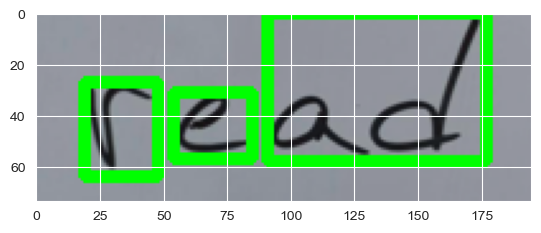

In [11]:
import cv2
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt



image = cv2.imread("images/img_22.png")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 5)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY_INV,11,8)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilate = cv2.dilate(thresh, kernel, iterations=10)

cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    area = cv2.contourArea(c)
    if area > 500:
        x,y,w,h = cv2.boundingRect(c)
        ROI = image[y:y+h, x:x+w]
        plt.imshow(ROI)
        break

img_gray = cv2.cvtColor(ROI, cv2.COLOR_BGR2GRAY)
img_gauss = cv2.GaussianBlur(img_gray, (3,3), 0)
kernel = np.ones((4,4), np.uint8)
erode = cv2.erode(img_gauss, kernel, iterations=1)
th3 = cv2.adaptiveThreshold(erode,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,51,10)
ctrs, hier = cv2.findContours(th3.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(ctr) for ctr in ctrs]
rects.sort()


for rect in rects:
    x, y, w, h = rect
    cv2.rectangle(ROI, (x, y), (x+w, y+h), (0, 255, 0), 3)
    plt.imshow(ROI)

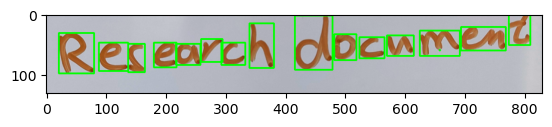

In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import joblib


image = cv2.imread("images/img_21.png")
segmented_letters = []

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Segement letters like "i" and "j" by closing gaps between them
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)


# Perform connected components analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=4)

# sort the letters


# Loop through each connected component
for i in range(1, num_labels):
    # Extract the connected component mask
    component_mask = np.uint8(labels == i) * 255

    # Find the bounding box of the connected component
    x, y, w, h, area = stats[i]

    # Extract the connected component ROI
    ROI = image[y:y+h, x:x+w]
    component_mask = component_mask[y:y+h, x:x+w]

    # Apply mask to the ROI to extract the individual letter
    letter = cv2.bitwise_and(ROI, ROI, mask=component_mask)
    letter = cv2.resize(letter, (100, 100))
    segmented_letters.append((letter, x))

    # Plot the whole word with bounding boxes
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    plt.imshow(image)

# Sort the letter images
segmented_letters = sorted(segmented_letters, key=lambda x: x[1])

sorted_letters = [letter for letter in segmented_letters]

# Extract the sorted segmented letter images from the sorted list
cv2.destroyAllWindows()


# 2. Text Detection & Prediction

/var/folders/yf/tjnxsljs5kq0vt7fhjkzh8ym0000gn/T/ipykernel_1228/3578671603.py:64: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features = hog(gray, orientations=12,
/var/folders/yf/tjnxsljs5kq0vt7fhjkzh8ym0000gn/T/ipykernel_1228/3578671603.py:64: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features = hog(gray, orientations=12,
/var/folders/yf/tjnxsljs5kq0vt7fhjkzh8ym0000gn/T/ipykernel_1228/3578671603.py:64: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features = hog(gray, orientations=12,
/var/folders/yf/tjnxsljs5kq0vt7fhjkzh8ym0000gn/T/ipykernel_1228/3578671603.py:64: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use 

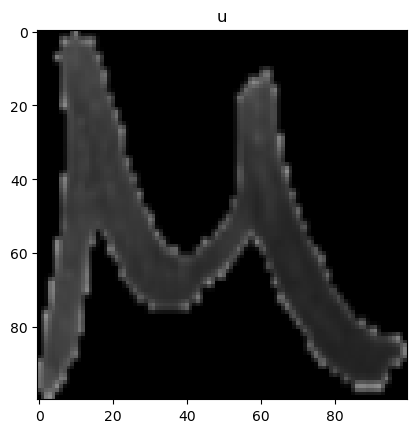

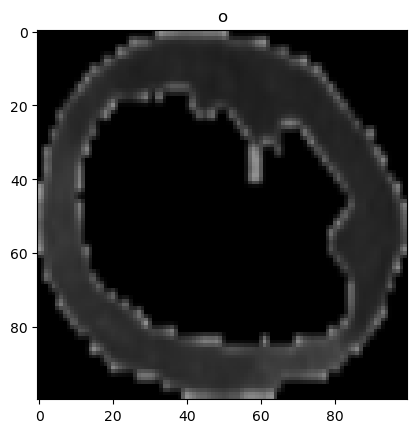

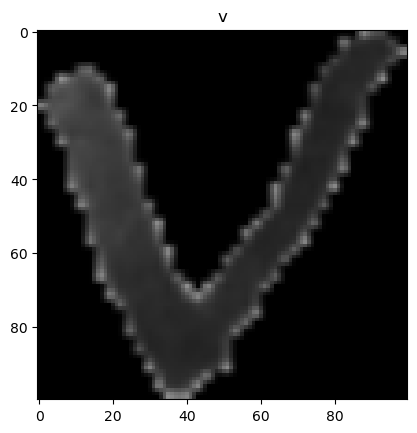

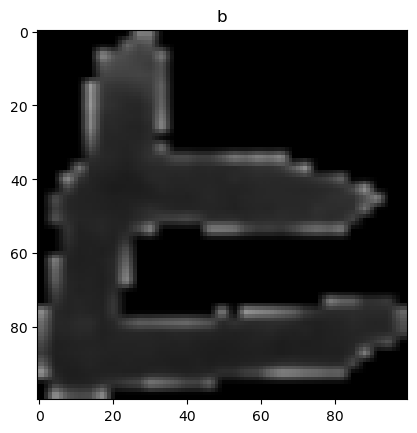

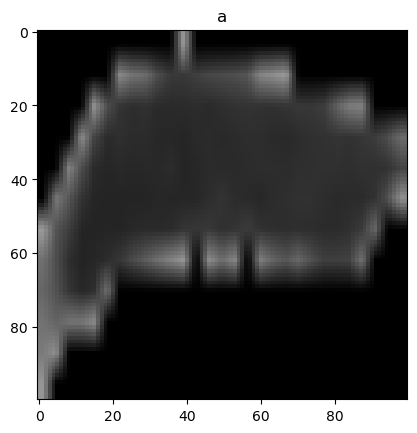

uovba


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.feature import hog
import joblib

image = cv2.imread("images/img_11.png")
segmented_letters = []

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Segement letters like "i" and "j" by closing gaps between them
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

# Perform connected components analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=4)

# Sort the letters
def sort_letters_by_position(letters):
    """Sorts letters in a list by their x position"""
    return sorted(letters, key=lambda letter: letter[1])

letters = []
for i in range(1, num_labels):
    # Extract the connected component mask
    component_mask = np.uint8(labels == i) * 255

    # Find the bounding box of the connected component
    x, y, w, h, area = stats[i]

    # Extract the connected component ROI
    ROI = image[y:y+h, x:x+w]
    component_mask = component_mask[y:y+h, x:x+w]

    # Apply mask to the ROI to extract the individual letter
    letter = cv2.bitwise_and(ROI, ROI, mask=component_mask)
    letter = cv2.resize(letter, (100, 100))

    # Convert binary image to 3-channel RGB image
    letter_rgb = np.stack((letter,) * 3, axis=-1)

    # Add letter and its position to list
    letters.append((letter_rgb, x))

# Sort letters by x position
letters = sort_letters_by_position(letters)

# Extract the sorted segmented letter images from the sorted list
segmented_letters = [letter for letter, x in letters]

# Load the trained SVM classifier
classifier = joblib.load("svm_model7.pkl")

# Predict the word
predicted_word = []
for letter in segmented_letters:
    # Convert letter to grayscale
    gray = rgb2gray(letter)

    # Compute the HOG features for the resized image
    hog_features = hog(gray, orientations=12,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True, multichannel=True)

    # Use the trained classifier to predict the letter
    predicted_letter = classifier.predict([hog_features])[0]
    predicted_word.append(predicted_letter)

# Join the predicted letters to form the word
segmented_letters = [letter[:, :, 0] for letter in segmented_letters]

for i, letter in enumerate(segmented_letters):
    plt.imshow(letter)
    plt.title(predicted_word[i])
    plt.show()

predicted_word = "".join(predicted_word)

print(predicted_word)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import warnings
warnings.filterwarnings("ignore")

img = cv2.imread("Assets/magana.png", 0)

def show(img, figsize=(20, 20)):
    fig = plt.figure(figsize=figsize)
    plt.imshow(img, cmap="gray")
    plt.show()
show(img)


In [ ]:
def borders(here_img, thresh, bthresh=0.092):
    shape = here_img.shape
    #check = int(115 * size[0] / 600)
    #check = int(55 * size[0] / 600)
    check= int(bthresh*shape[0])
    image = here_img[:]
    top, bottom = 0, shape[0] - 1
    #plt.imshow(image)
    #plt.show()


    #find the background color for empty column
    bg = np.repeat(thresh, shape[1])
    count = 0
    for row in range(1, shape[0]):
        if  (np.equal(bg, image[row]).any()) == True:
            #print(count)
            count += 1
        else:
            count = 0
        if count >= check:
            top = row - check
            break


    bg = np.repeat(thresh, shape[1])
    count = 0
    rows = np.arange(1, shape[0])
    #print(rows)
    for row in rows[::-1]:
        if  (np.equal(bg, image[row]).any()) == True:
            count += 1
        else:
            count = 0
        if count >= check:
            bottom = row + count
            break

    d1 = (top - 2) >= 0
    d2 = (bottom + 2) < shape[0]
    d = d1 and d2
    if(d):
        b = 2
    else:
        b = 0

    return (top, bottom, b)


def preprocess(bgr_img):#gray image
    blur = cv2.GaussianBlur(bgr_img,(5,5),0)
    ret,th_img = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) #converts black to white and inverse

    rows, cols = th_img.shape
    bg_test = np.array([th_img[i][i] for i in range(5)])
    if bg_test.all() == 0:
        text_color = 255
    else:
        text_color = 0

    tb = borders(th_img, text_color)
    lr = borders(th_img.T, text_color)
    dummy = int(np.average((tb[2], lr[2]))) + 2
    template = th_img[tb[0]+dummy:tb[1]-dummy, lr[0]+dummy:lr[1]-dummy]

    plt.imshow(template)
    plt.show()
    return (template, tb, lr)
prepimg, tb, lr = preprocess(img)


In [ ]:
def segmentation(bordered, thresh=255, min_seg=10, scheck=0.15):
    try:
        shape = bordered.shape
        check = int(scheck * shape[0])
        image = bordered[:]
        image = image[check:].T
        shape = image.shape
        #plt.imshow(image)
        #plt.show()

        #find the background color for empty column
        bg = np.repeat(255 - thresh, shape[1])
        bg_keys = []
        for row in range(1, shape[0]):
            if  (np.equal(bg, image[row]).all()):
                bg_keys.append(row)

        lenkeys = len(bg_keys)-1
        new_keys = [bg_keys[1], bg_keys[-1]]
        #print(lenkeys)
        for i in range(1, lenkeys):
            if (bg_keys[i+1] - bg_keys[i]) > check:
                new_keys.append(bg_keys[i])
                #print(i)

        new_keys = sorted(new_keys)
        #print(new_keys)
        segmented_templates = []
        first = 0
        bounding_boxes = []
        for key in new_keys[1:]:
            segment = bordered.T[first:key]
            if segment.shape[0]>=min_seg and segment.shape[1]>=min_seg:
                segmented_templates.append(segment.T)
                bounding_boxes.append((first, key))
            first = key

        last_segment = bordered.T[new_keys[-1]:]
        if last_segment.shape[0]>=min_seg and last_segment.shape[1]>=min_seg:
            segmented_templates.append(last_segment.T)
            bounding_boxes.append((new_keys[-1], new_keys[-1]+last_segment.shape[0]))


        return(segmented_templates, bounding_boxes)
    except:
        return [bordered, (0, bordered.shape[1])]
segments=segmentation(prepimg)
for simg in segments[0]:
    plt.imshow(simg)
    plt.show()
